In [1]:
# [Pandas] DataFrame을 이용한 그룹 연산
# https://kimdingko-world.tistory.com/205

In [2]:
# 기타 libs
import os

In [3]:
os.getcwd()

'C:\\Users\\kiwon0116\\ANA\\WnJ'

In [345]:
## 필요모듈 
import os # OS관련
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as patches

In [5]:
# pandas를 불러온다.
import pandas as pd

# Data Max값 설정
pd.set_option('display.max_rows', None)

In [6]:
# XLSX 불러오기
df = pd.read_excel('TeamTaskG_PlayLog LOOP9.xlsx')

In [7]:
# PIVOT
df.head()

dui     updateTime  \
0  1804da565855c9983be198f8de384c76e9018aa4  1662373780444   
1  1804da565855c9983be198f8de384c76e9018aa4  1662373755260   
2  1804da565855c9983be198f8de384c76e9018aa4  1662373722192   
3  1804da565855c9983be198f8de384c76e9018aa4  1662373661723   
4  1804da565855c9983be198f8de384c76e9018aa4  1662373643070   

           createdTime        hostname     logType sceneName      logComment  \
0  2022년 9월 5일 오후 7:29  SEONGYULCHOI-W     TurnOff    Proto1          게임 종료.   
1  2022년 9월 5일 오후 7:29  SEONGYULCHOI-W  CheckPoint    Proto1   Check Point 3   
2  2022년 9월 5일 오후 7:28  SEONGYULCHOI-W  CheckPoint    Proto1   Check Point 3   
3  2022년 9월 5일 오후 7:27  SEONGYULCHOI-W  CheckPoint    Proto1   Check Point 3   
4  2022년 9월 5일 오후 7:27  SEONGYULCHOI-W       Clear    Proto1  Gluttony Clear   

                          title  
0  SEONGYULCHOI-W_1662373780444  
1  SEONGYULCHOI-W_1662373755260  
2  SEONGYULCHOI-W_1662373722192  
3  SEONGYULCHOI-W_1662373661723  
4  SEONGYULCHOI-W_1662373643070

In [8]:
# dui 컬럼 제거
dfe = df.drop('dui', axis=1)

# dui createdTime 컬럼 제거
dfe = dfe.drop('createdTime', axis='columns')

# dui title 컬럼 제거
dfe = dfe.drop('title', axis='columns')

# sceneName 컬럼 제거.
dfe = dfe.drop('sceneName', axis=1)

dfe['updaTimeMS'] = dfe.updateTime

dfe.updateTime = (dfe.updateTime/1000)

dfe.updateTime = dfe.updateTime.astype(int)

# 한글 제거
dfe.loc[df['logType'] == 'TurnOn', 'logComment'] = 'GameStart'
dfe.loc[df['logType'] == 'TurnOff', 'logComment'] = 'GameTerminate'
dfe.loc[df['logType'] == 'Dead', 'logComment'] = 'Dead'

dfe

updateTime         hostname     logType  \
0     1662373780   SEONGYULCHOI-W     TurnOff   
1     1662373755   SEONGYULCHOI-W  CheckPoint   
2     1662373722   SEONGYULCHOI-W  CheckPoint   
3     1662373661   SEONGYULCHOI-W  CheckPoint   
4     1662373643   SEONGYULCHOI-W       Clear   
5     1662373376   SEONGYULCHOI-W  CheckPoint   
6     1662373370   SEONGYULCHOI-W        Dead   
7     1662373297   SEONGYULCHOI-W  CheckPoint   
8     1662373291   SEONGYULCHOI-W        Dead   
9     1662373084   SEONGYULCHOI-W  CheckPoint   
10    1662373077   SEONGYULCHOI-W        Dead   
11    1662372853   SEONGYULCHOI-W  CheckPoint   
12    1662372811   SEONGYULCHOI-W  CheckPoint   
13    1662372787   SEONGYULCHOI-W  CheckPoint   
14    1662372762   SEONGYULCHOI-W  CheckPoint   
15    1662372744   SEONGYULCHOI-W  CheckPoint   
16    1662372725   SEONGYULCHOI-W  CheckPoint   
17    1662372687   SEONGYULCHOI-W  CheckPoint   
18    1662372660   SEONGYULCHOI-W  CheckPoint   
19    1662372617   SEONGYULCHOI-W  CheckPoint   
20    1662372603   SEONGYULCHOI-W  CheckPoint   
21    1662372489   SEONGYULCHOI-W  CheckPoint   
22    1662372456   SEONGYULCHOI-W  CheckPoint   
23    1662372416   SEONGYULCHOI-W  CheckPoint   
24    1662372391   SEONGYULCHOI-W  CheckPoint   
25    1662372316   SEONGYULCHOI-W  CheckPoint   
26    1662372219   SEONGYULCHOI-W  CheckPoint   
27    1662372131   SEONGYULCHOI-W  CheckPoint   
28    1662372048   SEONGYULCHOI-W      TurnOn   
29    1662365409           TAMA-W        Dead   
30    1662106021           TAMA-W        Dead   
31    1662102318         SGYOON-W     TurnOff   
32    1662102308         SGYOON-W        Dead   
33    1662102237         SGYOON-W  CheckPoint   
34    1662102175           TAMA-W        Dead   
35    1662101958         SGYOON-W  CheckPoint   
36    1662101925         SGYOON-W  CheckPoint   
37    1662101896         SGYOON-W  CheckPoint   
38    1662101878         SGYOON-W  CheckPoint   
39    1662101829         SGYOON-W  CheckPoint   
40    1662101731         SGYOON-W  CheckPoint   
41    1662101645         SGYOON-W  CheckPoint   
42    1662101543         SGYOON-W      TurnOn   
43    1662100647         SGYOON-W     TurnOff   
44    1662100633         SGYOON-W      TurnOn   
45    1662098306   PUBG-CLARARHEE     TurnOff   
46    1662098294   PUBG-CLARARHEE      TurnOn   
47    1662089384     SUYOUNGKIM-W     TurnOff   
48    1662083403     SUYOUNGKIM-W        Dead   
49    1662083348     SUYOUNGKIM-W  CheckPoint   
50    1662083260     SUYOUNGKIM-W  CheckPoint   
51    1662082595     SUYOUNGKIM-W  CheckPoint   
52    1662082526     SUYOUNGKIM-W      TurnOn   
53    1662082064   PUBG-CLARARHEE     TurnOff   
54    1662082062   PUBG-CLARARHEE        Dead   
55    1662082011   PUBG-CLARARHEE        Dead   
56    1662081953   PUBG-CLARARHEE  CheckPoint   
57    1662081946   PUBG-CLARARHEE        Dead   
58    1662081867   PUBG-CLARARHEE  CheckPoint   
59    1662081801   PUBG-CLARARHEE  CheckPoint   
60    1662081775   PUBG-CLARARHEE  CheckPoint   
61    1662081646   PUBG-CLARARHEE  CheckPoint   
62    1662081579   PUBG-CLARARHEE  CheckPoint   
63    1662081531   PUBG-CLARARHEE  CheckPoint   
64    1662081509   PUBG-CLARARHEE  CheckPoint   
65    1662081482   PUBG-CLARARHEE  CheckPoint   
66    1662081391   PUBG-CLARARHEE  CheckPoint   
67    1662081353   PUBG-CLARARHEE  CheckPoint   
68    1662081314   PUBG-CLARARHEE        Dead   
69    1662081282   PUBG-CLARARHEE  CheckPoint   
70    1662081168   PUBG-CLARARHEE  CheckPoint   
71    1662081150   PUBG-CLARARHEE  CheckPoint   
72    1662081124   PUBG-CLARARHEE  CheckPoint   
73    1662081093   PUBG-CLARARHEE  CheckPoint   
74    1662081042   PUBG-CLARARHEE  CheckPoint   
75    1662081018   PUBG-CLARARHEE  CheckPoint   
76    1662080946   PUBG-CLARARHEE  CheckPoint   
77    1662080858   PUBG-CLARARHEE  CheckPoint   
78    1662080798   PUBG-CLARARHEE      TurnOn   
79    1662077680           MAXX-H     TurnOff   
80    1662077009           MAXX-H    

In [9]:
# csv로 저장
dfe.to_csv('dfe.csv', encoding='utf-8')

In [10]:
# 각유저 시간별로 정렬된 값으로 변경
sorted_dfe = dfe.sort_values(by=['hostname', 'updateTime'])

In [11]:
sorted_dfe[sorted_dfe.hostname == 'YIONGUON-H']

updateTime    hostname     logType                         logComment  \
189  1661769103  YIONGUON-H      TurnOn                          GameStart   
188  1661769152  YIONGUON-H  CheckPoint                       CheckPoint 1   
187  1661769247  YIONGUON-H  CheckPoint  CheckPoint 1-1 (Gain HomerunMask)   
186  1661769262  YIONGUON-H        Dead                               Dead   
185  1661769341  YIONGUON-H  CheckPoint     CheckPoint 1-2 (Flower2+Frog1)   
184  1661769460  YIONGUON-H  CheckPoint       CheckPoint 1-3 (Before Town)   
183  1661769492  YIONGUON-H  CheckPoint                      Check Point 2   
182  1661769520  YIONGUON-H  CheckPoint   CheckPoint 2-1 (After WaterLeaf)   
181  1661769551  YIONGUON-H  CheckPoint       CheckPoint 2-2 (CircleArena)   
180  1661769642  YIONGUON-H  CheckPoint   CheckPoint 2-3 (Cave BomberMask)   
179  1661769687  YIONGUON-H  CheckPoint        CheckPoint 2-4 CaveWallRoom   
178  1661769688  YIONGUON-H        Dead                               Dead   
177  1661769712  YIONGUON-H        Dead                               Dead   
176  1661769730  YIONGUON-H      TurnOn                          GameStart   
175  1661769735  YIONGUON-H     TurnOff                      GameTerminate   

        updaTimeMS  
189  1661769103807  
188  1661769152465  
187  1661769247713  
186  1661769262777  
185  1661769341776  
184  1661769460898  
183  1661769492205  
182  1661769520855  
181  1661769551200  
180  1661769642285  
179  1661769687627  
178  1661769688852  
177  1661769712831  
176  1661769730461  
175  1661769735046

In [12]:
sorted_dfe = sorted_dfe
sorted_dfe['elapsedTime'] = 0
sorted_dfe['gap'] = 0

sorted_dfe[(sorted_dfe.hostname == 'ARAMIYA-P-W')]

updateTime     hostname     logType     logComment     updaTimeMS  \
1221  1661391499  ARAMIYA-P-W      TurnOn      GameStart  1661391499164   
1218  1661391579  ARAMIYA-P-W  CheckPoint   CheckPoint 1  1661391579441   
1214  1661391666  ARAMIYA-P-W        Dead           Dead  1661391666085   
1212  1661391671  ARAMIYA-P-W     TurnOff  GameTerminate  1661391671326   

      elapsedTime  gap  
1221            0    0  
1218            0    0  
1214            0    0  
1212            0    0

In [13]:
sorted_dfe[(sorted_dfe.hostname == 'ARAMIYA-P-W') & (sorted_dfe.logType == 'Dead')]

updateTime     hostname logType logComment     updaTimeMS  elapsedTime  \
1214  1661391666  ARAMIYA-P-W    Dead       Dead  1661391666085            0   

      gap  
1214    0

In [14]:
sorted_dfe[(sorted_dfe.hostname == 'ARAMIYA-P-W') & (sorted_dfe.logType == 'Dead')].index

Int64Index([1214], dtype='int64')

In [15]:
sorted_dfe[(sorted_dfe.hostname == 'ARAMIYA-P-W')].index

Int64Index([1221, 1218, 1214, 1212], dtype='int64')

In [16]:
# hostname에 해당하는 Index List 반환하는 함수
def GetIndexList(hostname):
    """
    Return index list of hostname
    """
    return sorted_dfe[(sorted_dfe.hostname == hostname)].index

In [17]:
# target 데이터프레임에 존재하는 유저의 elapsedTime 갱신
def RefreshElapsedTime(targetDF):
    """
    Update from dataframe to elapsedTime each hostName
    """
    # 임시 데이터프레임 tdf 생성
    tdf = pd.DataFrame()
    
    # hostname과 listIndex로 구성된 DF임
    tdf['hostname'] = targetDF['hostname'].unique() # 고유한 hostname으로 축약
    
    # 모든 hostName순회 하며 값 변경 적용
    for hn in tdf.hostname:
        # hn으로 indexList 찾아두기
        il = GetIndexList(hn)
        
        ## indexList의 갯수
        count = len(il)
        if count > 1:
            headIndex = il[0]
            targetDF.loc[[headIndex], ['elapsedTime']] = 0 # head값은 0으로 초기화
            headUpdateTime = targetDF.loc[[headIndex], 'updateTime']
            # head뒤의 값 기준으로 계산 적용하기
            prevElapsedTime = 0
            for idx in il[1:]:
                updateTime = targetDF.loc[[idx], 'updateTime']
                elapsedTime = updateTime.values[0] - headUpdateTime.values[0]
                targetDF.loc[[idx],['elapsedTime']] = elapsedTime # 대입
                targetDF.loc[[idx],['gap']] = elapsedTime - prevElapsedTime # 대입
                prevElapsedTime = elapsedTime
                # print(f'idx({idx} headUpdateTime({headUpdateTime}) updateTime({updateTime}) elapsedTime({elapsedTime})')

        

In [18]:
RefreshElapsedTime(sorted_dfe)

# 반영되어 변경된 결과 출력
sorted_dfe

updateTime         hostname     logType  \
1221  1661391499      ARAMIYA-P-W      TurnOn   
1218  1661391579      ARAMIYA-P-W  CheckPoint   
1214  1661391666      ARAMIYA-P-W        Dead   
1212  1661391671      ARAMIYA-P-W     TurnOff   
642   1661404264         CHST27-W      TurnOn   
638   1661404366         CHST27-W  CheckPoint   
635   1661404502         CHST27-W        Dead   
633   1661404577         CHST27-W  CheckPoint   
631   1661404695         CHST27-W     TurnOff   
792   1661402077  DESKTOP-3NP5D3D      TurnOn   
784   1661402158  DESKTOP-3NP5D3D  CheckPoint   
783   1661402165  DESKTOP-3NP5D3D  CheckPoint   
776   1661402233  DESKTOP-3NP5D3D  CheckPoint   
767   1661402305  DESKTOP-3NP5D3D  CheckPoint   
766   1661402318  DESKTOP-3NP5D3D  CheckPoint   
752   1661402512  DESKTOP-3NP5D3D  CheckPoint   
740   1661402663  DESKTOP-3NP5D3D  CheckPoint   
737   1661402673  DESKTOP-3NP5D3D  CheckPoint   
735   1661402698  DESKTOP-3NP5D3D  CheckPoint   
734   1661402723  DESKTOP-3NP5D3D  CheckPoint   
730   1661402761  DESKTOP-3NP5D3D  CheckPoint   
728   1661402804  DESKTOP-3NP5D3D        Dead   
727   1661402811  DESKTOP-3NP5D3D  CheckPoint   
718   1661402967  DESKTOP-3NP5D3D  CheckPoint   
717   1661403005  DESKTOP-3NP5D3D        Dead   
711   1661403047  DESKTOP-3NP5D3D  CheckPoint   
703   1661403149  DESKTOP-3NP5D3D  CheckPoint   
701   1661403184  DESKTOP-3NP5D3D        Dead   
679   1661403430  DESKTOP-3NP5D3D  CheckPoint   
672   1661403495  DESKTOP-3NP5D3D        Dead   
670   1661403585  DESKTOP-3NP5D3D  CheckPoint   
667   1661403662  DESKTOP-3NP5D3D      TurnOn   
665   1661403674  DESKTOP-3NP5D3D     TurnOff   
104   1662015481  DESKTOP-6FUS5O9      TurnOn   
103   1662015558  DESKTOP-6FUS5O9  CheckPoint   
102   1662015721  DESKTOP-6FUS5O9  CheckPoint   
101   1662016182  DESKTOP-6FUS5O9  CheckPoint   
100   1662016507  DESKTOP-6FUS5O9  CheckPoint   
99    1662016575  DESKTOP-6FUS5O9  CheckPoint   
98    1662016599  DESKTOP-6FUS5O9  CheckPoint   
97    1662016634  DESKTOP-6FUS5O9  CheckPoint   
96    1662016681  DESKTOP-6FUS5O9  CheckPoint   
95    1662016700  DESKTOP-6FUS5O9  CheckPoint   
94    1662016782  DESKTOP-6FUS5O9        Dead   
93    1662016883  DESKTOP-6FUS5O9        Dead   
92    1662016973  DESKTOP-6FUS5O9        Dead   
91    1662017052  DESKTOP-6FUS5O9        Dead   
90    1662017141  DESKTOP-6FUS5O9        Dead   
89    1662017226  DESKTOP-6FUS5O9        Dead   
88    1662017229  DESKTOP-6FUS5O9     TurnOff   
504   1661413778  DESKTOP-8AN5C1M      TurnOn   
502   1661413912  DESKTOP-8AN5C1M  CheckPoint   
501   1661413915  DESKTOP-8AN5C1M  CheckPoint   
500   1661414051  DESKTOP-8AN5C1M  CheckPoint   
499   1661414082  DESKTOP-8AN5C1M  CheckPoint   
498   1661414171  DESKTOP-8AN5C1M  CheckPoint   
497   1661414188  DESKTOP-8AN5C1M  CheckPoint   
496   1661414199  DESKTOP-8AN5C1M  CheckPoint   
495   1661414216  DESKTOP-8AN5C1M  CheckPoint   
494   1661414240  DESKTOP-8AN5C1M  CheckPoint   
493   1661414353  DESKTOP-8AN5C1M  CheckPoint   
492   1661414441  DESKTOP-8AN5C1M  CheckPoint   
491   1661414494  DESKTOP-8AN5C1M  CheckPoint   
490   1661414530  DESKTOP-8AN5C1M  CheckPoint   
489   1661414557  DESKTOP-8AN5C1M  CheckPoint   
487   1661414801  DESKTOP-8AN5C1M  CheckPoint   
486   1661414826  DESKTOP-8AN5C1M  CheckPoint   
485   1661414840  DESKTOP-8AN5C1M  CheckPoint   
484   1661414876  DESKTOP-8AN5C1M  CheckPoint   
483   1661414915  DESKTOP-8AN5C1M  CheckPoint   
482   1661415049  DESKTOP-8AN5C1M        Dead   
481   1661415055  DESKTOP-8AN5C1M  CheckPoint   
480   1661415255  DESKTOP-8AN5C1M       Clear   
479   1661415274  DESKTOP-8AN5C1M  CheckPoint   
478   1661415297  DESKTOP-8AN5C1M     TurnOff   
477   1661415305  DESKTOP-8AN5C1M      TurnOn   
476   1661415354  DESKTOP-8AN5C1M  CheckPoint   
475   1661415419  DESKTOP-8AN5C1M  CheckPoint   
474   1661415474  DESKTOP-8AN5C1M  CheckPoint   
473   1661415526  DESKTOP-8AN5C1M  CheckPoint   
472   1661415537  DESKTOP-8AN5C1M  Ch

In [19]:
vDF = sorted_dfe[sorted_dfe.elapsedTime < 30000] # 이상한 오차값 제거

In [20]:
vDF = vDF[['hostname', 'logType', 'logComment', 'elapsedTime', 'gap']]
# view를 위한 LogType 추가.
vDF['vLogType'] = vDF['logComment']

vDF

hostname     logType                           logComment  \
1221      ARAMIYA-P-W      TurnOn                            GameStart   
1218      ARAMIYA-P-W  CheckPoint                         CheckPoint 1   
1214      ARAMIYA-P-W        Dead                                 Dead   
1212      ARAMIYA-P-W     TurnOff                        GameTerminate   
642          CHST27-W      TurnOn                            GameStart   
638          CHST27-W  CheckPoint                         CheckPoint 1   
635          CHST27-W        Dead                                 Dead   
633          CHST27-W  CheckPoint    CheckPoint 1-1 (Gain HomerunMask)   
631          CHST27-W     TurnOff                        GameTerminate   
792   DESKTOP-3NP5D3D      TurnOn                            GameStart   
784   DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
783   DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
776   DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
767   DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
766   DESKTOP-3NP5D3D  CheckPoint    CheckPoint 1-1 (Gain HomerunMask)   
752   DESKTOP-3NP5D3D  CheckPoint       CheckPoint 1-2 (Flower2+Frog1)   
740   DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
737   DESKTOP-3NP5D3D  CheckPoint         CheckPoint 1-3 (Before Town)   
735   DESKTOP-3NP5D3D  CheckPoint                        Check Point 2   
734   DESKTOP-3NP5D3D  CheckPoint     CheckPoint 2-1 (After WaterLeaf)   
730   DESKTOP-3NP5D3D  CheckPoint         CheckPoint 2-2 (CircleArena)   
728   DESKTOP-3NP5D3D        Dead                                 Dead   
727   DESKTOP-3NP5D3D  CheckPoint                        Check Point 2   
718   DESKTOP-3NP5D3D  CheckPoint     CheckPoint 2-3 (Cave BomberMask)   
717   DESKTOP-3NP5D3D        Dead                                 Dead   
711   DESKTOP-3NP5D3D  CheckPoint          CheckPoint 2-4 CaveWallRoom   
703   DESKTOP-3NP5D3D  CheckPoint  CheckPoint 2-5 (Outside Cave Lever)   
701   DESKTOP-3NP5D3D        Dead                                 Dead   
679   DESKTOP-3NP5D3D  CheckPoint                      CheckPoint 2-4B   
672   DESKTOP-3NP5D3D        Dead                                 Dead   
670   DESKTOP-3NP5D3D  CheckPoint            CheckPoint 2-6 (TownCave)   
667   DESKTOP-3NP5D3D      TurnOn                            GameStart   
665   DESKTOP-3NP5D3D     TurnOff                        GameTerminate   
104   DESKTOP-6FUS5O9      TurnOn                            GameStart   
103   DESKTOP-6FUS5O9  CheckPoint                         CheckPoint 1   
102   DESKTOP-6FUS5O9  CheckPoint    CheckPoint 1-1 (Gain HomerunMask)   
101   DESKTOP-6FUS5O9  CheckPoint       CheckPoint 1-2 (Flower2+Frog1)   
100   DESKTOP-6FUS5O9  CheckPoint                         CheckPoint 1   
99    DESKTOP-6FUS5O9  CheckPoint                         CheckPoint 1   
98    DESKTOP-6FUS5O9  CheckPoint         CheckPoint 1-3 (Before Town)   
97    DESKTOP-6FUS5O9  CheckPoint                        Check Point 2   
96    DESKTOP-6FUS5O9  CheckPoint     CheckPoint 2-1 (After WaterLeaf)   
95    DESKTOP-6FUS5O9  CheckPoint         CheckPoint 2-2 (CircleArena)   
94    DESKTOP-6FUS5O9        Dead                                 Dead   
93    DESKTOP-6FUS5O9        Dead                                 Dead   
92    DESKTOP-6FUS5O9        Dead                                 Dead   
91    DESKTOP-6FUS5O9        Dead                                 Dead   
90    DESKTOP-6FUS5O9        Dead                                 Dead   
89    DESKTOP-6FUS5O9        Dead                                 Dead   
88    DESKTOP-6FUS5O9     TurnOff                        GameTerminate   
504   DESKTOP-8AN5C1M      TurnOn                            GameStart   
502   DESKTOP-8AN5C1M  CheckPoint                         CheckPoint 1   
501   DESKTOP-8AN5C1M  CheckPoint                         CheckPoint 1   
500   DESKTOP-8AN

In [21]:
TARGET_HOST_NAME = 'DESKTOP-3NP5D3D'

gDF = vDF[vDF.hostname == TARGET_HOST_NAME]

gDF

hostname     logType                           logComment  \
792  DESKTOP-3NP5D3D      TurnOn                            GameStart   
784  DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
783  DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
776  DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
767  DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
766  DESKTOP-3NP5D3D  CheckPoint    CheckPoint 1-1 (Gain HomerunMask)   
752  DESKTOP-3NP5D3D  CheckPoint       CheckPoint 1-2 (Flower2+Frog1)   
740  DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
737  DESKTOP-3NP5D3D  CheckPoint         CheckPoint 1-3 (Before Town)   
735  DESKTOP-3NP5D3D  CheckPoint                        Check Point 2   
734  DESKTOP-3NP5D3D  CheckPoint     CheckPoint 2-1 (After WaterLeaf)   
730  DESKTOP-3NP5D3D  CheckPoint         CheckPoint 2-2 (CircleArena)   
728  DESKTOP-3NP5D3D        Dead                                 Dead   
727  DESKTOP-3NP5D3D  CheckPoint                        Check Point 2   
718  DESKTOP-3NP5D3D  CheckPoint     CheckPoint 2-3 (Cave BomberMask)   
717  DESKTOP-3NP5D3D        Dead                                 Dead   
711  DESKTOP-3NP5D3D  CheckPoint          CheckPoint 2-4 CaveWallRoom   
703  DESKTOP-3NP5D3D  CheckPoint  CheckPoint 2-5 (Outside Cave Lever)   
701  DESKTOP-3NP5D3D        Dead                                 Dead   
679  DESKTOP-3NP5D3D  CheckPoint                      CheckPoint 2-4B   
672  DESKTOP-3NP5D3D        Dead                                 Dead   
670  DESKTOP-3NP5D3D  CheckPoint            CheckPoint 2-6 (TownCave)   
667  DESKTOP-3NP5D3D      TurnOn                            GameStart   
665  DESKTOP-3NP5D3D     TurnOff                        GameTerminate   

     elapsedTime  gap                             vLogType  
792            0    0                            GameStart  
784           81   81                         CheckPoint 1  
783           88    7                         CheckPoint 1  
776          156   68                         CheckPoint 1  
767          228   72                         CheckPoint 1  
766          241   13    CheckPoint 1-1 (Gain HomerunMask)  
752          435  194       CheckPoint 1-2 (Flower2+Frog1)  
740          586  151                         CheckPoint 1  
737          596   10         CheckPoint 1-3 (Before Town)  
735          621   25                        Check Point 2  
734          646   25     CheckPoint 2-1 (After WaterLeaf)  
730          684   38         CheckPoint 2-2 (CircleArena)  
728          727   43                                 Dead  
727          734    7                        Check Point 2  
718          890  156     CheckPoint 2-3 (Cave BomberMask)  
717          928   38                                 Dead  
711          970   42          CheckPoint 2-4 CaveWallRoom  
703         1072  102  CheckPoint 2-5 (Outside Cave Lever)  
701         1107   35                                 Dead  
679         1353  246                      CheckPoint 2-4B  
672         1418   65                                 Dead  
670         1508   90            CheckPoint 2-6 (TownCave)  
667         1585   77                            GameStart  
665         1597   12                        GameTerminate

In [197]:
def draw_user_bar(df):
    _BAR_HEIGHT_ = 0.5 # 바 높이 인데 반응이 없다.
    _HOST_NAME_ = 'TO_DO_HOSTNAME'
    config_bar = {} # 바 차트를 꾸미기위한 옵션
    edge_color=None
    
    fig = plt.figure(figsize=(20, 12)) ## 캔버스 생성 1440 x 432
    fig.set_facecolor('white') ## 캔버스 배경색 설정
    ax = fig.add_subplot() ## 그림이 그려질 축을 생성 (실제로 그림을 그림)
    # plt.ylabel(_HOST_NAME_, rotation=45, fontsize=16) # y축 라벨 이름 설정
    plt.ylim(-1.0, 1.0) # Y축 LIMIT : 오히려 이것으로 Y축 높이를 지정하는 느낌
    ax.axes.yaxis.set_ticklabels([]) # y축 라벨 제거     
    plt.grid(True, axis='x', color='grey', alpha=0.5, linestyle='--') # x 축만 격자 표시 'y' or 'both'(Default)
    # TITLE 지정
    fontStyle = {
        'fontsize':32,
        'fontweight':'bold'
    }
    plt.title(_HOST_NAME_, loc='center', pad=20, fontdict=fontStyle)
    
    lstSubCategory = list(df.vLogType.unique())
    num_sub_category = len(df.vLogType.unique()) ## 서브 카테고리 개수
    #print('lstSubCategory:', lstSubCategory)
    #print('num_sub_category:', num_sub_category)
    
    tick_label = [_HOST_NAME_] ## 메인 카테고리 라벨 생성
    tick_number = len(tick_label) ## 메인 카테고리 눈금 개수
    tick_coord = np.arange(tick_number) ## 메인 카테고리 x좌표 = 막대기 폭의 중심 x좌표
    colors = sns.color_palette('hls',num_sub_category) ## 막대기 색상 지정    
 
    config_tick = dict()
    config_tick['ticks'] = tick_coord ## 메인 카테고리 라벨 x좌표
    config_tick['labels'] = tick_label ## 메인 카테고리 라벨
    
    ## HORIZONTAL BAR CHART DRAW ####    
    # plt.yticks(**config_tick) ## y축 눈금 라벨 생성
    left = np.zeros_like(tick_coord) ## 좌측 x좌표 초기값
    
    isUnderText = False # 아래에 Text표기할지
    for i in df.index:
        isUnderText = not isUnderText
        row = df.loc[[i]]
        vLT = row.vLogType.values[0]
        ci = lstSubCategory.index(vLT)
        
        # 바 그리기
        bar = ax.barh(tick_coord, row.gap, \
                       _BAR_HEIGHT_, label=vLT, left = left, \
                       color=colors[ci], **config_bar) ## 바 차트 생성
        
        ### 우측선 그리기 ########################################
        b = bar[0] # 바 획득
        x_left = b.get_x() ## 바 좌측 하단 x좌표
        x_right = x_left+b.get_width() ## 바 우측 하단 x 좌표
        plt.axvline(x_right, 0.35, 0.65, color='black', linestyle='--', linewidth=1) # 선 그리기
        ##########################################################
        
        ### Text 출력 ########################################
        textFontDict = { 'size':16, 'color':'darkblue'}
        yPosRate = 0.35
        if isUnderText: 
            yPosRate = 0.35
        else:
            yPosRate = -0.35            
        # 텍스트 출력
        plt.text(x_right, yPosRate, row.elapsedTime.values[0], fontdict=textFontDict)
        ####################################################
        
        ### 특수 도형 그리기 ####################
        if vLT == 'Dead':
            ax.add_patch(
                patches.Rectangle((x_right-5, 0.3), # (x,y) 
                                10, 0.0125, # width, height
                                edgecolor='deeppink',
                                facecolor='black'
                               ))
            
            ax.add_patch(
                patches.Ellipse((x_right, 0.32), # (x,y) 
                                20, 0.02,  # width, height
                                edgecolor='deeppink',
                                facecolor='black'
                               ))
            plt.axvline(x_right, 0.35, 0.65, color='darkred', linestyle='-', linewidth=1.5) # 선 그리기
        #########################################
            
        left += row.gap.values[0] ## 좌측 x좌표 업데이트
        
    # 최종
    #plt.legend(loc=(1.0, 0.5)) ##범례 생성 loc='lower right' 형식도 가능
    #plt.legend(loc='best', ncol=2) ##범례 생성 loc='lower right' 형식도 가능    
    # CUSTOM  범례 카테고리 색상 및 Label 준비    
    legend_elements = []
    for cate in lstSubCategory:
        ci = lstSubCategory.index(cate)
        legend_elements.append(patches.Patch(facecolor=colors[ci], label=cate))

    plt.legend(handles = legend_elements, loc='upper left', ncol=2) # 범례표시 loc='left upper' loc=(1.0, 0.5)등 가능

    plt.show()

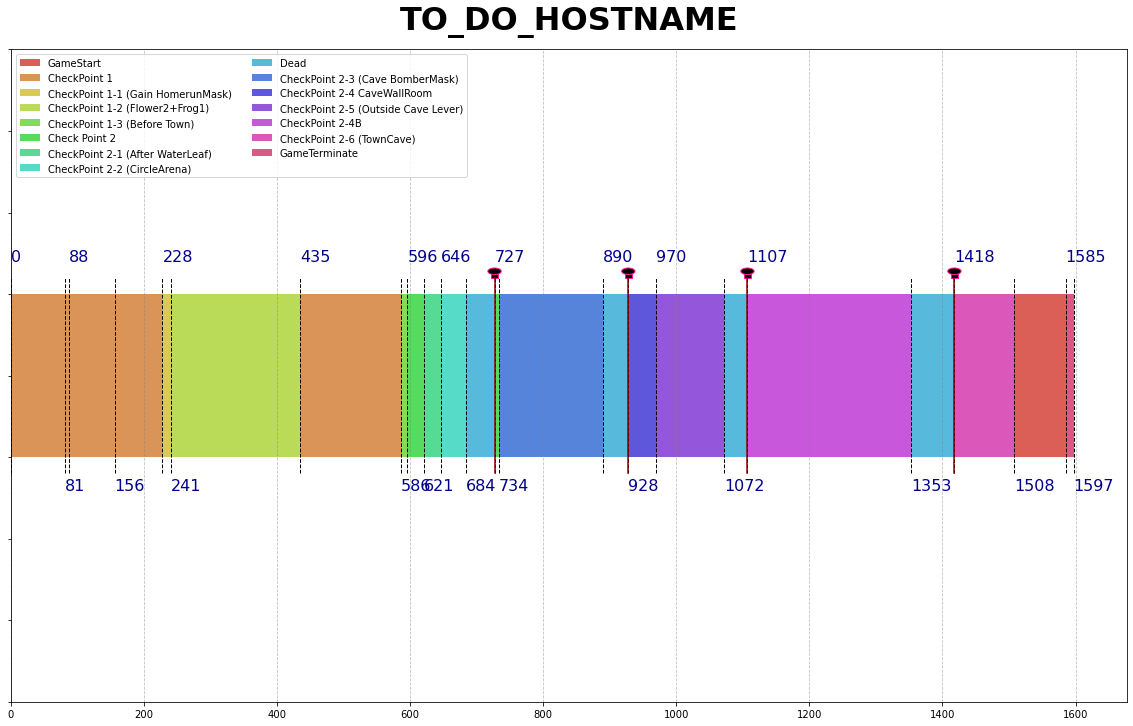

In [198]:
draw_user_bar(gDF)

In [356]:
def AnalyzeLog(srcDF, _HOST_NAME_, isSaveToPng = False):
    df = srcDF[srcDF.hostname == _HOST_NAME_]
    
    _BAR_HEIGHT_ = 0.5 # 바 높이 인데 반응이 없다.    
    config_bar = {} # 바 차트를 꾸미기위한 옵션
    edge_color=None    
    
    fig = plt.figure(figsize=(20, 12)) ## 캔버스 생성 1440 x 432
    fig.set_facecolor('white') ## 캔버스 배경색 설정
    ax = fig.add_subplot() ## 그림이 그려질 축을 생성 (실제로 그림을 그림)
    # plt.ylabel(_HOST_NAME_, rotation=45, fontsize=16) # y축 라벨 이름 설정
    plt.ylim(-1.0, 1.0) # Y축 LIMIT : 오히려 이것으로 Y축 높이를 지정하는 느낌
    ax.axes.yaxis.set_ticklabels([]) # y축 라벨 제거     
    plt.grid(True, axis='x', color='grey', alpha=0.5, linestyle='--') # x 축만 격자 표시 'y' or 'both'(Default)
    # TITLE 지정
    fontStyle = {
        'fontsize':32,
        'fontweight':'bold'
    }
    plt.title(_HOST_NAME_, loc='center', pad=20, fontdict=fontStyle)
    
    lstSubCategory = list(df.vLogType.unique())
    num_sub_category = len(df.vLogType.unique()) ## 서브 카테고리 개수
    #print('lstSubCategory:', lstSubCategory)
    #print('num_sub_category:', num_sub_category)
    
    tick_label = [_HOST_NAME_] ## 메인 카테고리 라벨 생성
    tick_number = len(tick_label) ## 메인 카테고리 눈금 개수
    tick_coord = np.arange(tick_number) ## 메인 카테고리 x좌표 = 막대기 폭의 중심 x좌표
    colors = sns.color_palette('hls',num_sub_category) ## 막대기 색상 지정    
 
    config_tick = dict()
    config_tick['ticks'] = tick_coord ## 메인 카테고리 라벨 x좌표
    config_tick['labels'] = tick_label ## 메인 카테고리 라벨
    
    ## HORIZONTAL BAR CHART DRAW ####    
    # plt.yticks(**config_tick) ## y축 눈금 라벨 생성
    left = np.zeros_like(tick_coord) ## 좌측 x좌표 초기값
    
    isUnderText = False # 아래에 Text표기할지
    for i in df.index:
        isUnderText = not isUnderText
        row = df.loc[[i]]
        vLT = row.vLogType.values[0]
        ci = lstSubCategory.index(vLT)
        
        # 바 그리기
        bar = ax.barh(tick_coord, row.gap, \
                       _BAR_HEIGHT_, label=vLT, left = left, \
                       color=colors[ci], **config_bar) ## 바 차트 생성
        
        ### 우측선 그리기 ########################################
        b = bar[0] # 바 획득
        x_left = b.get_x() ## 바 좌측 하단 x좌표
        x_right = x_left+b.get_width() ## 바 우측 하단 x 좌표
        plt.axvline(x_right, 0.35, 0.65, color='black', linestyle='--', linewidth=1) # 선 그리기
        ##########################################################
        
        ### Text 출력 ########################################
        TEXT_SIZE = 16
        textFontDict = { 'size':TEXT_SIZE, 'color':'darkblue'}
        yPosRate = 0.35
        rot = 0
        if isUnderText: 
            yPosRate = 0.325
            rot = 0
        else:
            yPosRate = -0.4            
            rot = -45
        # 텍스트 출력
        plt.text(x_right, yPosRate, row.elapsedTime.values[0], fontdict=textFontDict, rotation=rot, horizontalalignment='center')
        ####################################################
        
        ### 특수 도형 그리기 ####################
        deadFontDict = { 'size': 16, 'color':'darkred' }
        if vLT == 'Dead':
            plt.axvline(x_right, 0.35, 0.65, color='darkred', linestyle='-', linewidth=1.5) # 선 그리기
            plt.text(x_right, 0.4, 'Dead', fontdict=deadFontDict, rotation=90, horizontalalignment='center')
        #########################################
            
        left += row.gap.values[0] ## 좌측 x좌표 업데이트
        
    # 최종
    #plt.legend(loc=(1.0, 0.5)) ##범례 생성 loc='lower right' 형식도 가능
    #plt.legend(loc='best', ncol=2) ##범례 생성 loc='lower right' 형식도 가능    
    # CUSTOM  범례 카테고리 색상 및 Label 준비    
    legend_elements = []
    for cate in lstSubCategory:
        ci = lstSubCategory.index(cate)
        legend_elements.append(patches.Patch(facecolor=colors[ci], label=cate))

    plt.legend(handles = legend_elements, loc='upper left', ncol=2) # 범례표시 loc='left upper' loc=(1.0, 0.5)등 가능
    
    # plt.show() 보다는 먼저 호출 해줘야함. 
    if isSaveToPng == True:
        plt.savefig(f'{_HOST_NAME_}.png', bbox_inches='tight', dpi=150)
        print(f'{_HOST_NAME_}.png saved')

    plt.show() # 그리고 버퍼 비웁니다.

DESKTOP-3NP5D3D.png saved


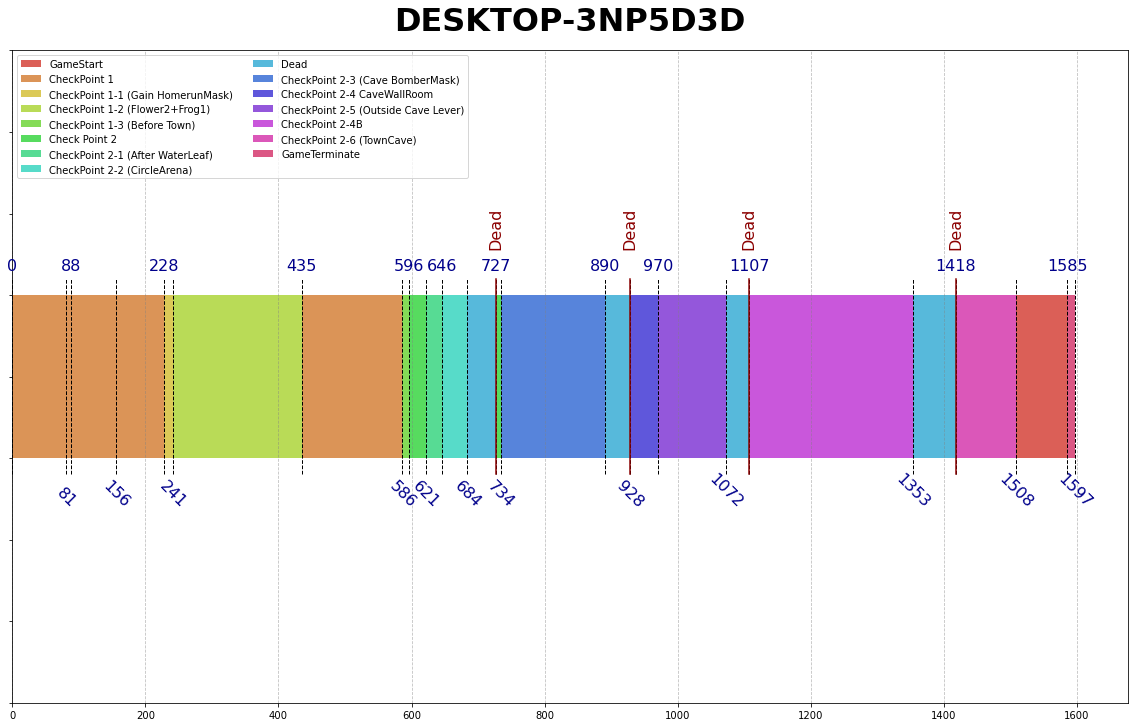

In [357]:
AnalyzeLog(vDF, 'DESKTOP-3NP5D3D', True)

In [303]:
vDF

hostname     logType                           logComment  \
1221      ARAMIYA-P-W      TurnOn                            GameStart   
1218      ARAMIYA-P-W  CheckPoint                         CheckPoint 1   
1214      ARAMIYA-P-W        Dead                                 Dead   
1212      ARAMIYA-P-W     TurnOff                        GameTerminate   
642          CHST27-W      TurnOn                            GameStart   
638          CHST27-W  CheckPoint                         CheckPoint 1   
635          CHST27-W        Dead                                 Dead   
633          CHST27-W  CheckPoint    CheckPoint 1-1 (Gain HomerunMask)   
631          CHST27-W     TurnOff                        GameTerminate   
792   DESKTOP-3NP5D3D      TurnOn                            GameStart   
784   DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
783   DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
776   DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
767   DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
766   DESKTOP-3NP5D3D  CheckPoint    CheckPoint 1-1 (Gain HomerunMask)   
752   DESKTOP-3NP5D3D  CheckPoint       CheckPoint 1-2 (Flower2+Frog1)   
740   DESKTOP-3NP5D3D  CheckPoint                         CheckPoint 1   
737   DESKTOP-3NP5D3D  CheckPoint         CheckPoint 1-3 (Before Town)   
735   DESKTOP-3NP5D3D  CheckPoint                        Check Point 2   
734   DESKTOP-3NP5D3D  CheckPoint     CheckPoint 2-1 (After WaterLeaf)   
730   DESKTOP-3NP5D3D  CheckPoint         CheckPoint 2-2 (CircleArena)   
728   DESKTOP-3NP5D3D        Dead                                 Dead   
727   DESKTOP-3NP5D3D  CheckPoint                        Check Point 2   
718   DESKTOP-3NP5D3D  CheckPoint     CheckPoint 2-3 (Cave BomberMask)   
717   DESKTOP-3NP5D3D        Dead                                 Dead   
711   DESKTOP-3NP5D3D  CheckPoint          CheckPoint 2-4 CaveWallRoom   
703   DESKTOP-3NP5D3D  CheckPoint  CheckPoint 2-5 (Outside Cave Lever)   
701   DESKTOP-3NP5D3D        Dead                                 Dead   
679   DESKTOP-3NP5D3D  CheckPoint                      CheckPoint 2-4B   
672   DESKTOP-3NP5D3D        Dead                                 Dead   
670   DESKTOP-3NP5D3D  CheckPoint            CheckPoint 2-6 (TownCave)   
667   DESKTOP-3NP5D3D      TurnOn                            GameStart   
665   DESKTOP-3NP5D3D     TurnOff                        GameTerminate   
104   DESKTOP-6FUS5O9      TurnOn                            GameStart   
103   DESKTOP-6FUS5O9  CheckPoint                         CheckPoint 1   
102   DESKTOP-6FUS5O9  CheckPoint    CheckPoint 1-1 (Gain HomerunMask)   
101   DESKTOP-6FUS5O9  CheckPoint       CheckPoint 1-2 (Flower2+Frog1)   
100   DESKTOP-6FUS5O9  CheckPoint                         CheckPoint 1   
99    DESKTOP-6FUS5O9  CheckPoint                         CheckPoint 1   
98    DESKTOP-6FUS5O9  CheckPoint         CheckPoint 1-3 (Before Town)   
97    DESKTOP-6FUS5O9  CheckPoint                        Check Point 2   
96    DESKTOP-6FUS5O9  CheckPoint     CheckPoint 2-1 (After WaterLeaf)   
95    DESKTOP-6FUS5O9  CheckPoint         CheckPoint 2-2 (CircleArena)   
94    DESKTOP-6FUS5O9        Dead                                 Dead   
93    DESKTOP-6FUS5O9        Dead                                 Dead   
92    DESKTOP-6FUS5O9        Dead                                 Dead   
91    DESKTOP-6FUS5O9        Dead                                 Dead   
90    DESKTOP-6FUS5O9        Dead                                 Dead   
89    DESKTOP-6FUS5O9        Dead                                 Dead   
88    DESKTOP-6FUS5O9     TurnOff                        GameTerminate   
504   DESKTOP-8AN5C1M      TurnOn                            GameStart   
502   DESKTOP-8AN5C1M  CheckPoint                         CheckPoint 1   
501   DESKTOP-8AN5C1M  CheckPoint                         CheckPoint 1   
500   DESKTOP-8AN

ARAMIYA-P-W.png saved


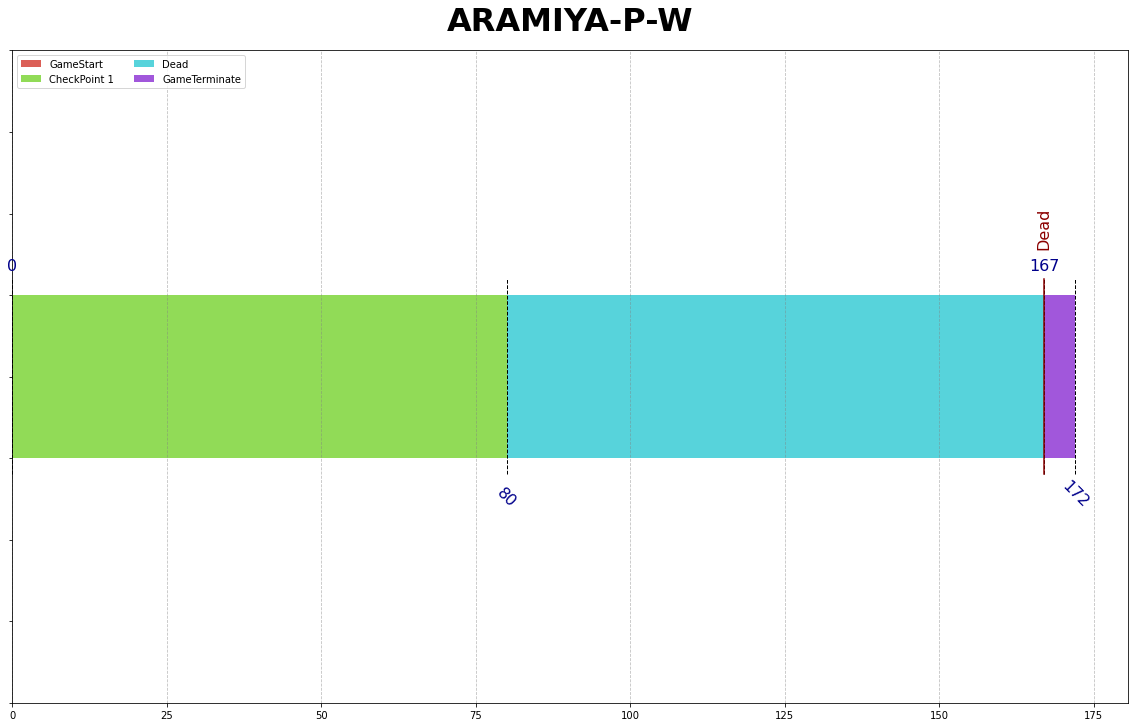

CHST27-W.png saved


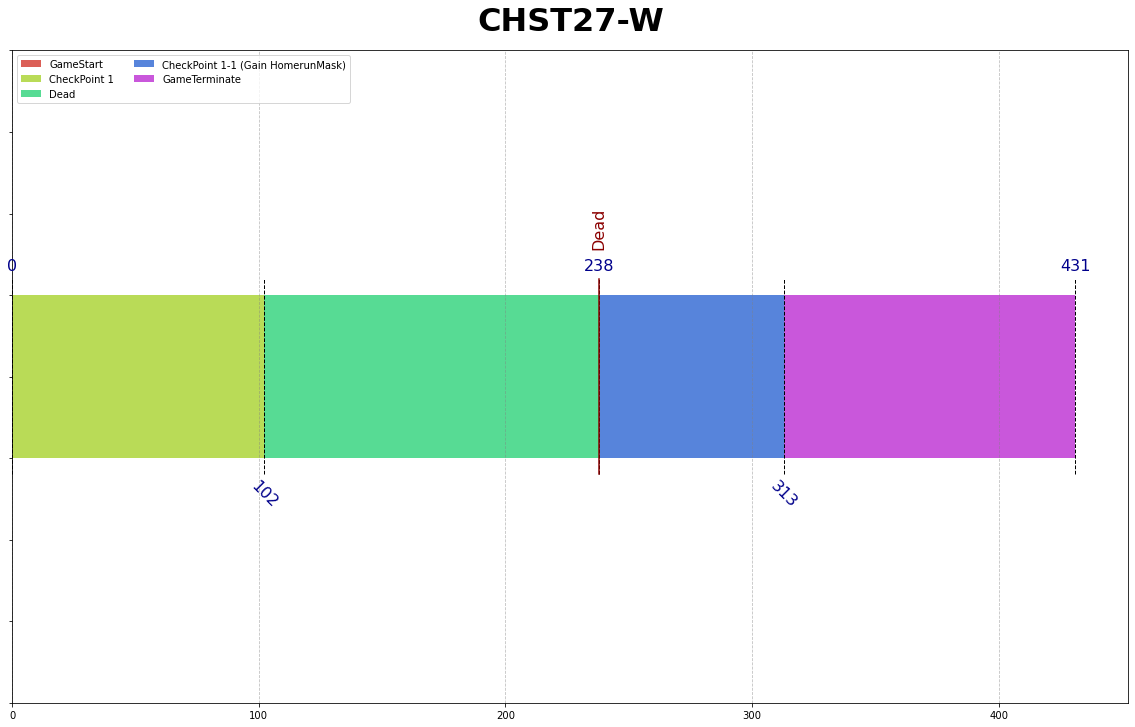

DESKTOP-3NP5D3D.png saved


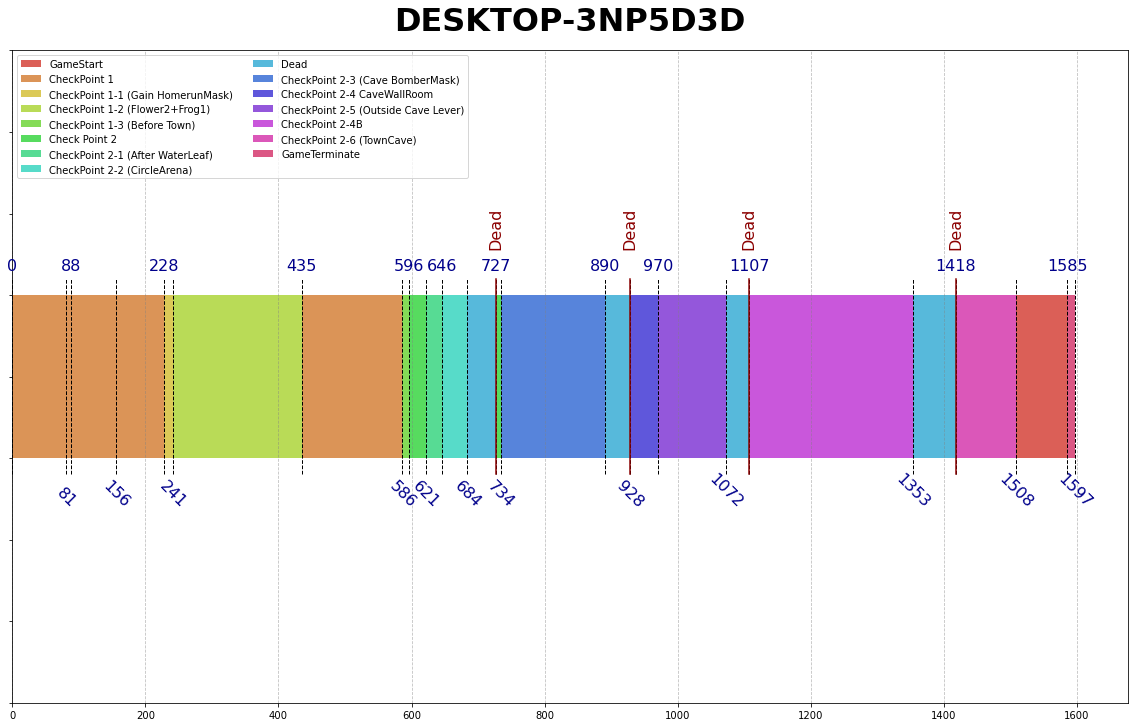

DESKTOP-6FUS5O9.png saved


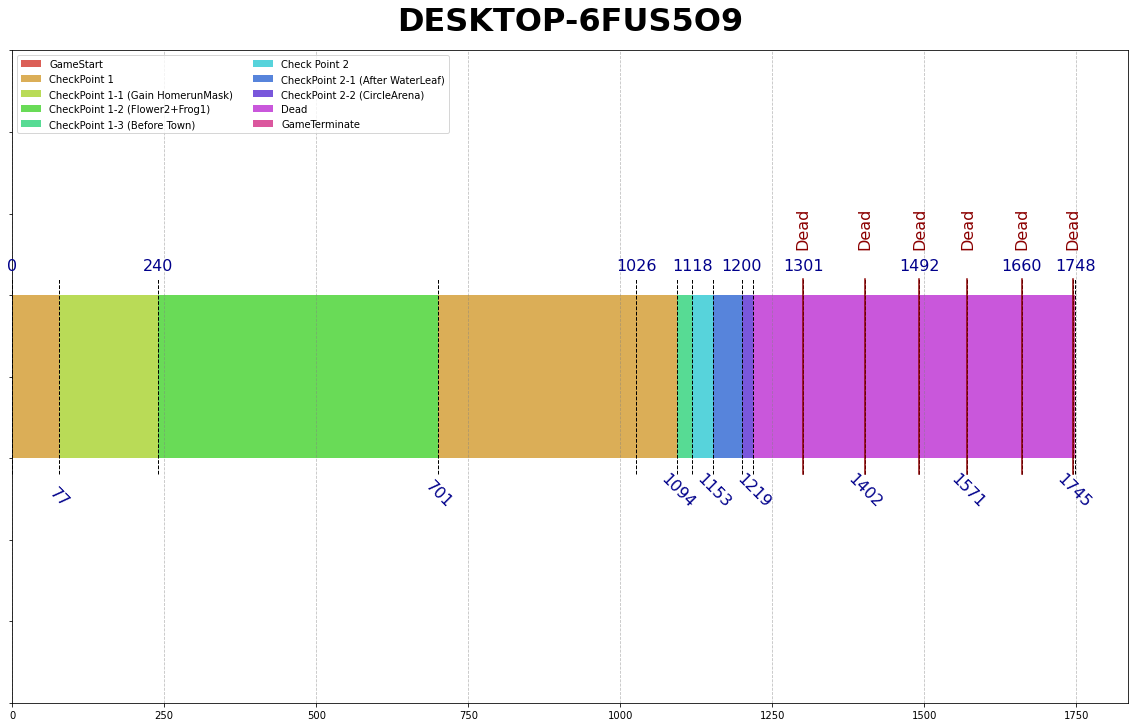

DESKTOP-8AN5C1M.png saved


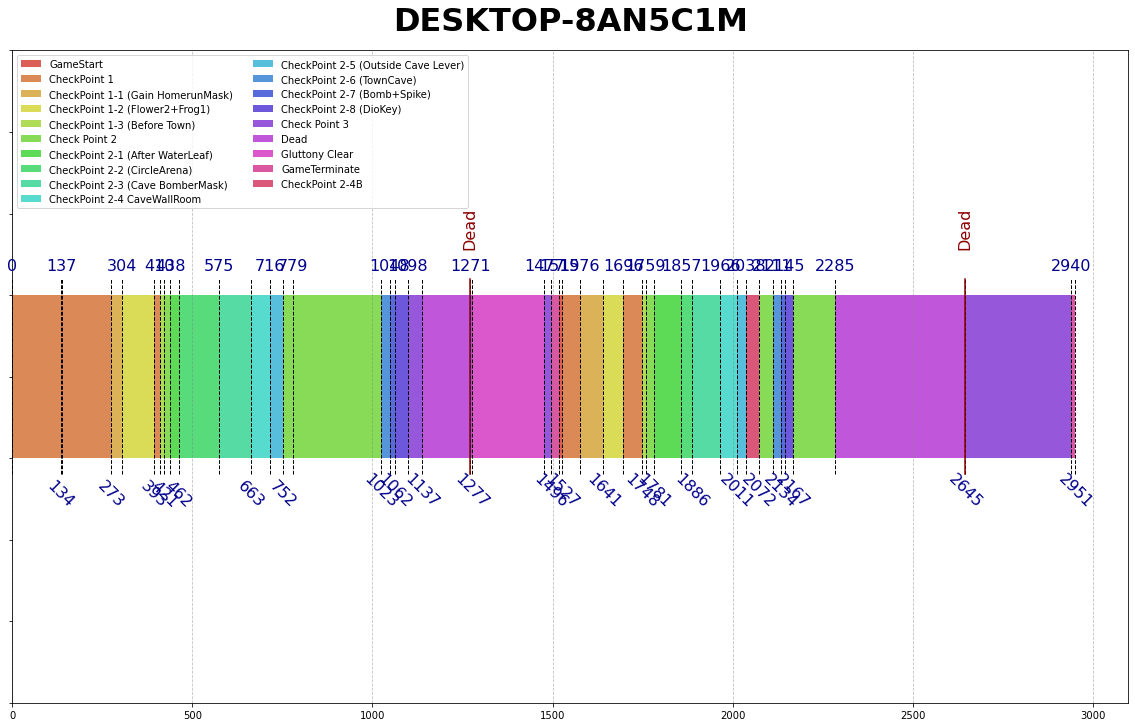

DESKTOP-8OIFT7P.png saved


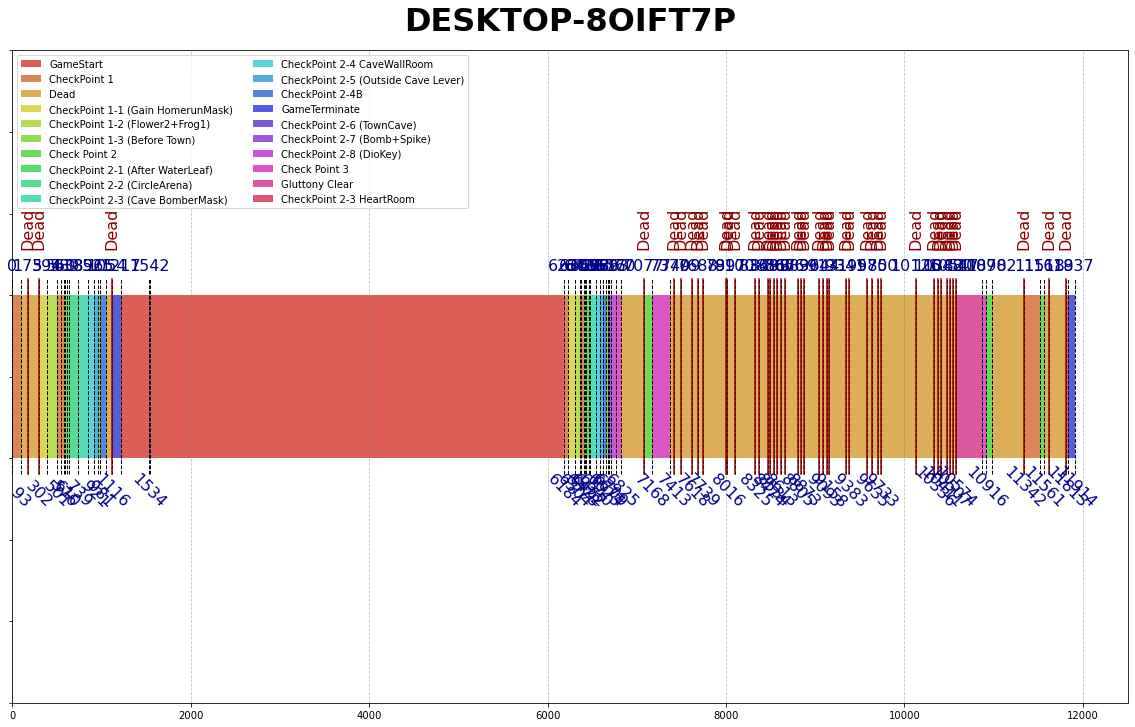

DESKTOP-947B115.png saved


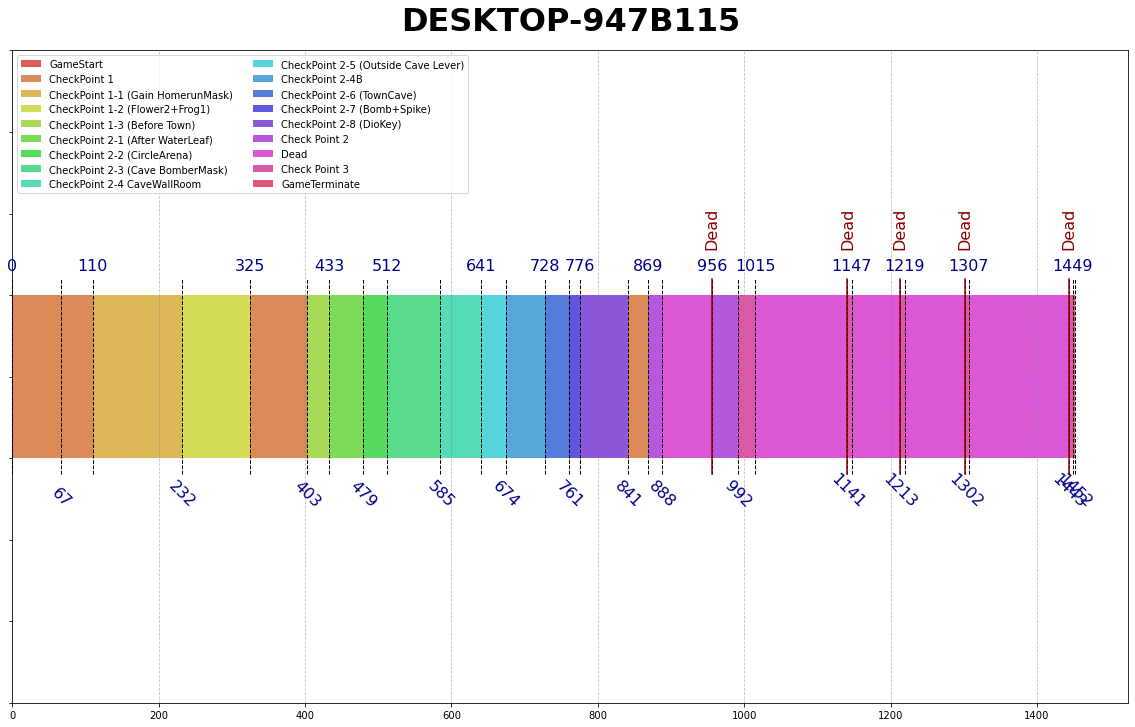

DESKTOP-ENDS3PM.png saved


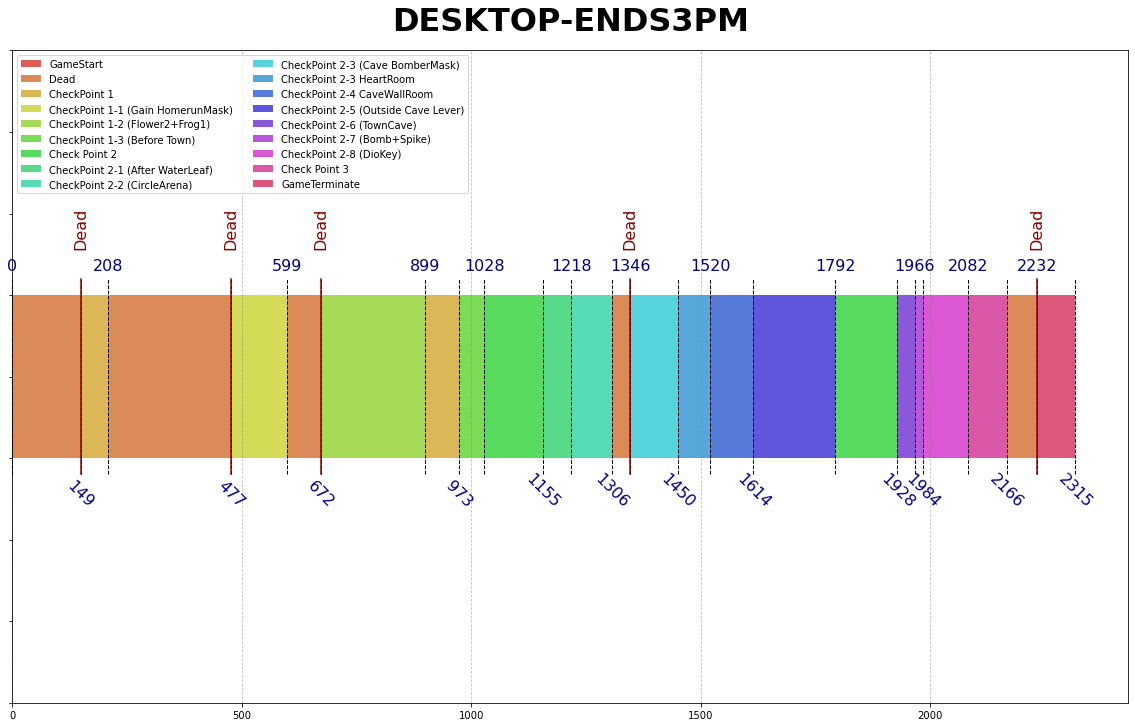

DESKTOP-IRMNDFF.png saved


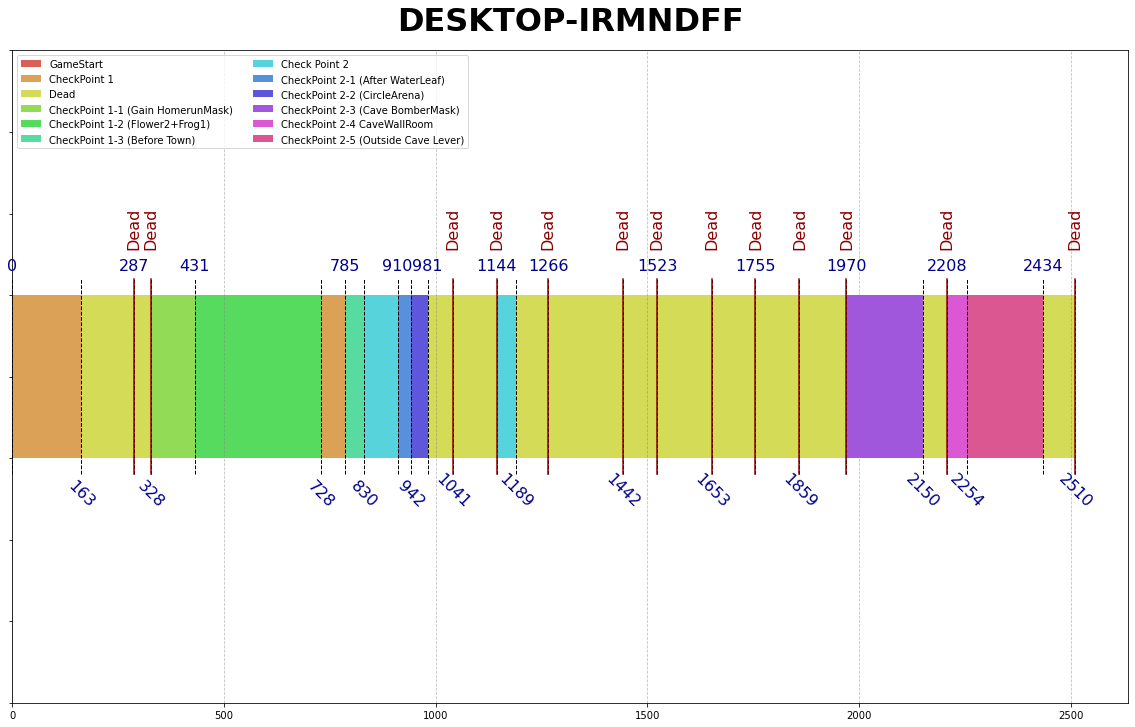

DESKTOP-JCO8KKN.png saved


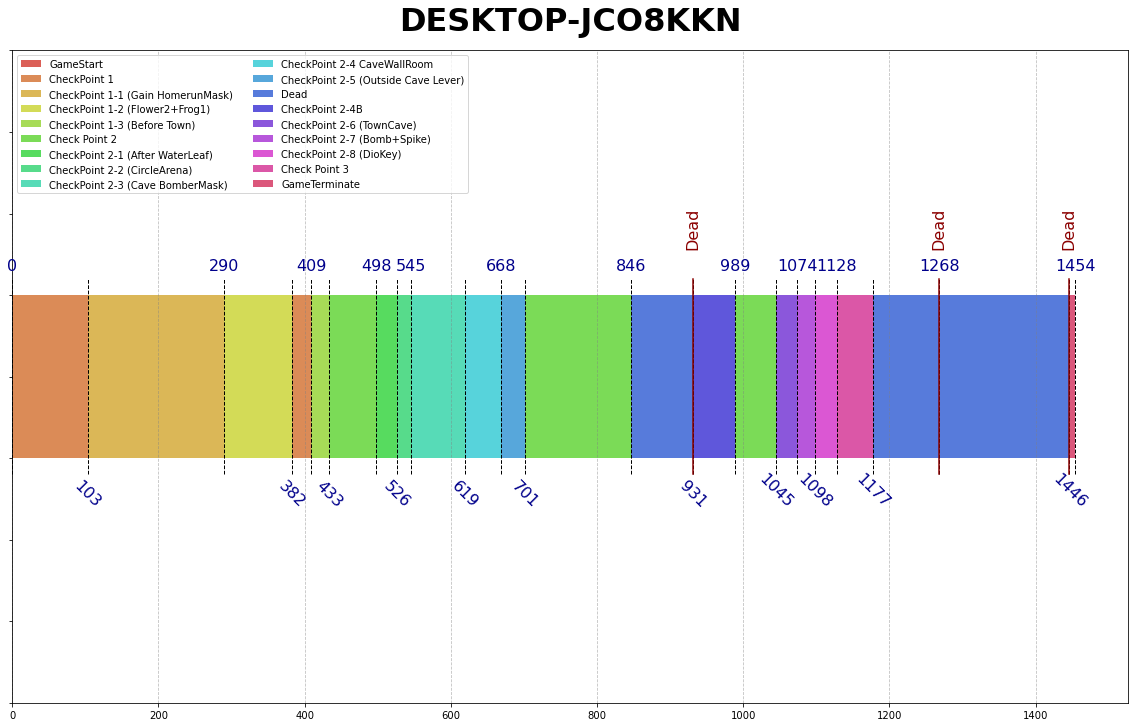

GANJAE-H.png saved


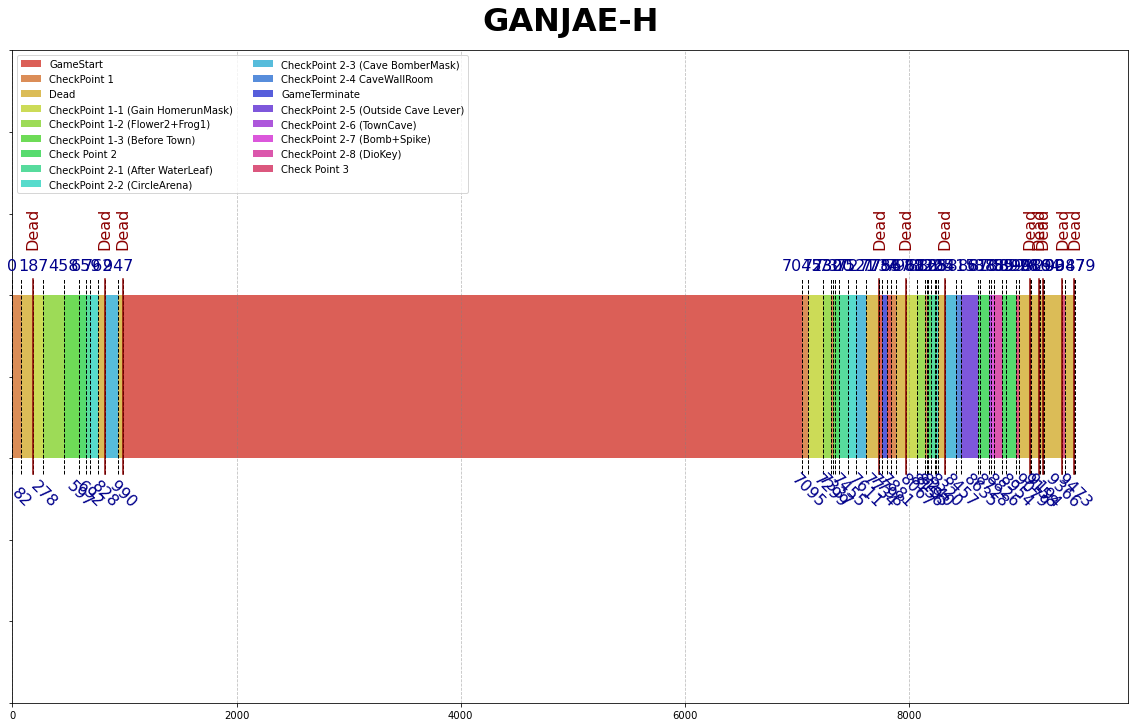

GOWND-W.png saved


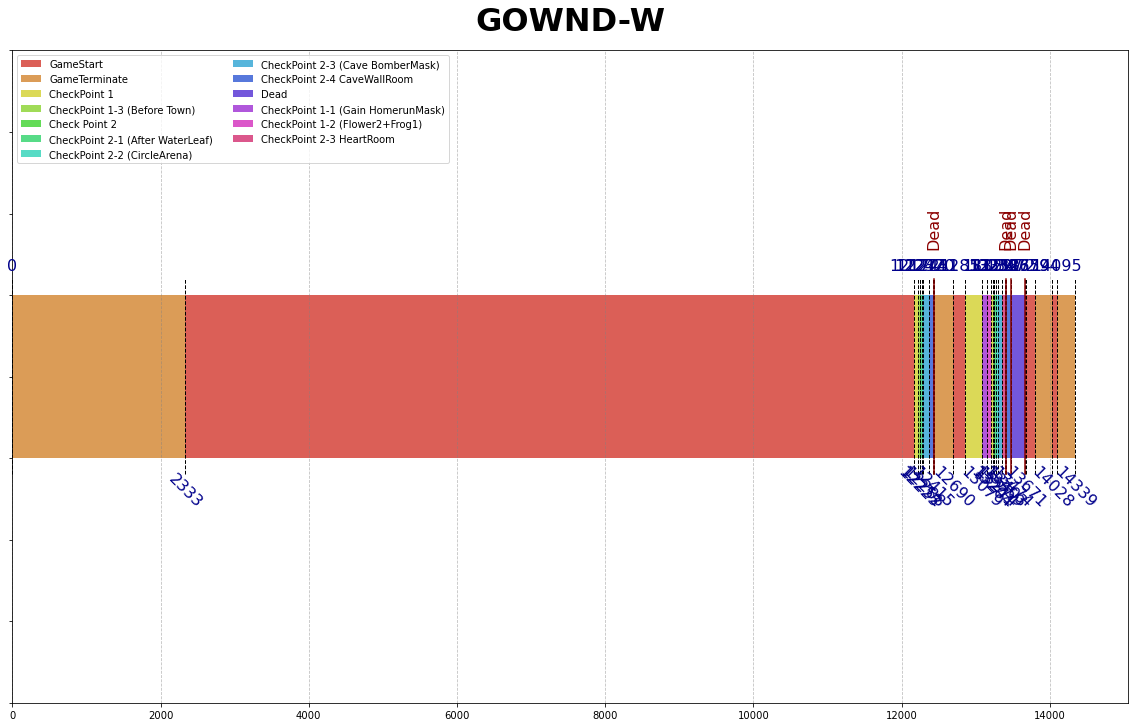

HYNJU-W.png saved


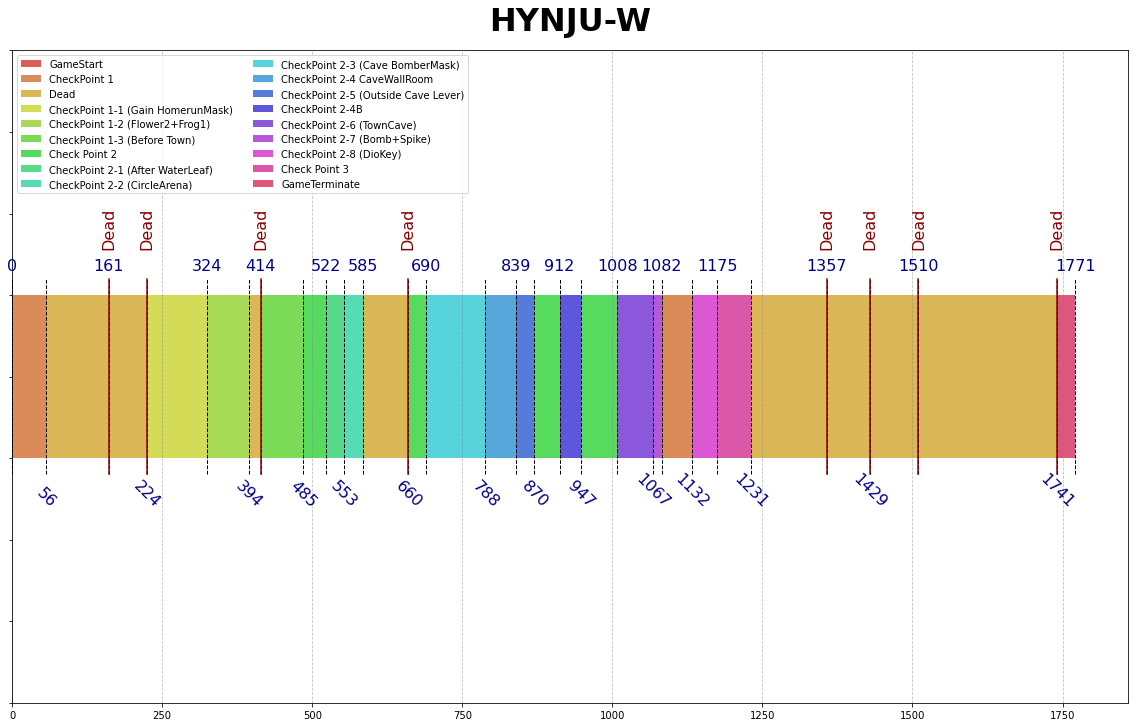

JENNALEE-W.png saved


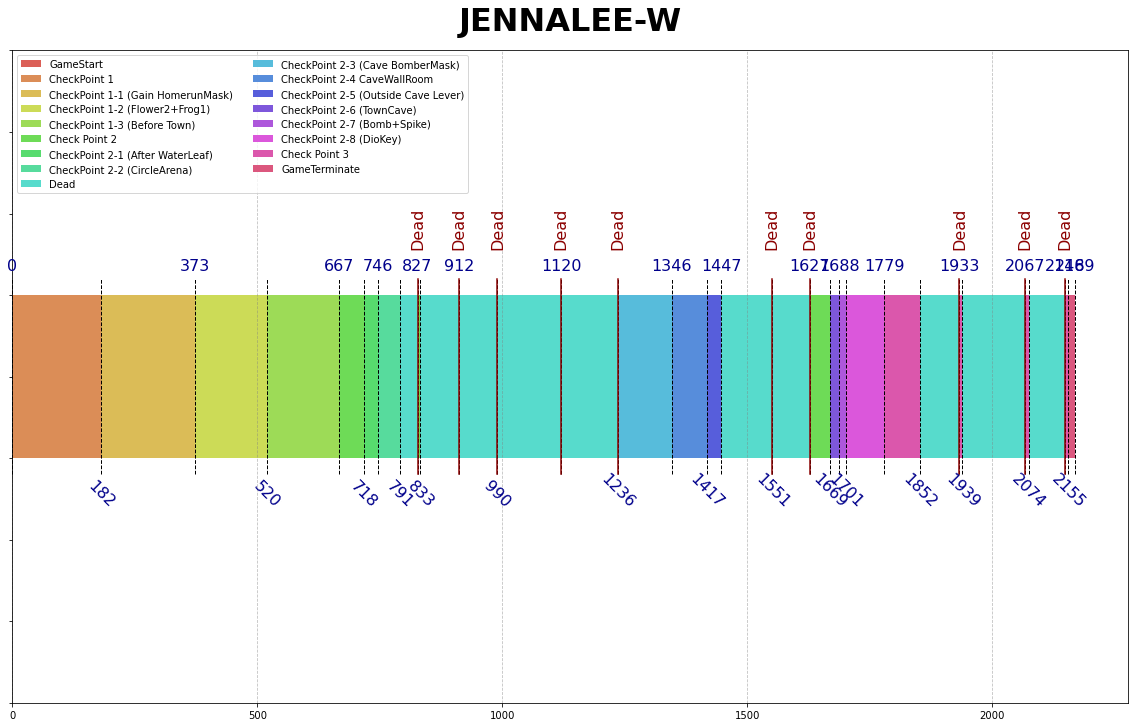

JONGIN-W.png saved


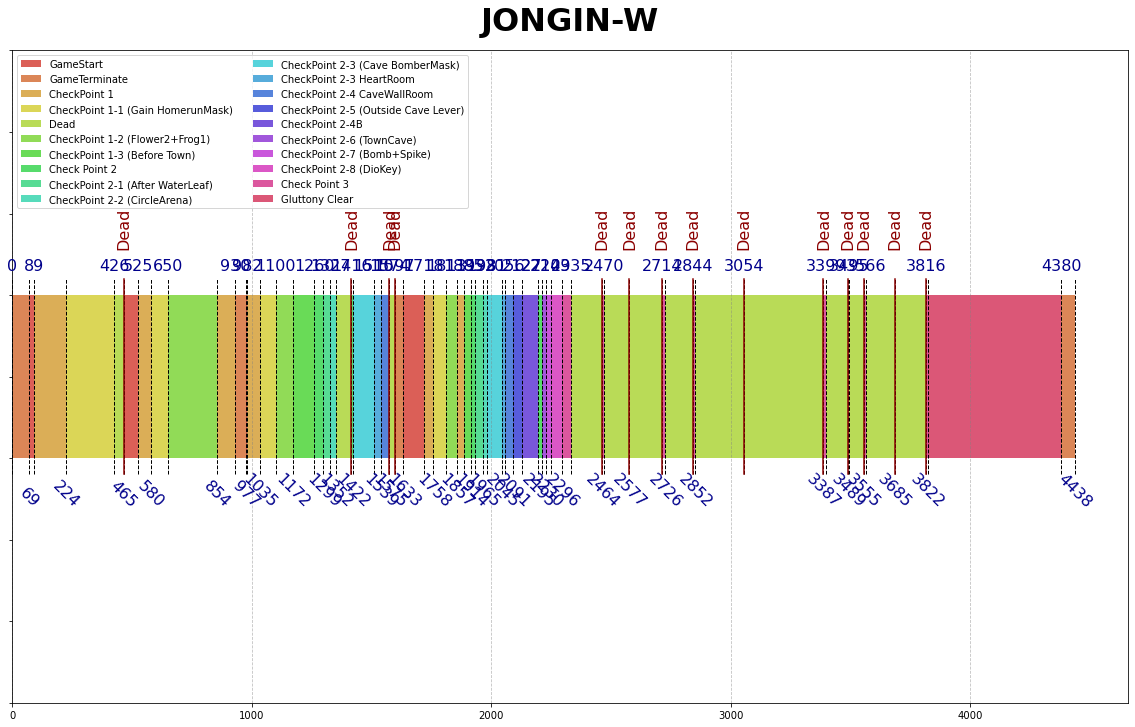

JUNGGANG-PC.png saved


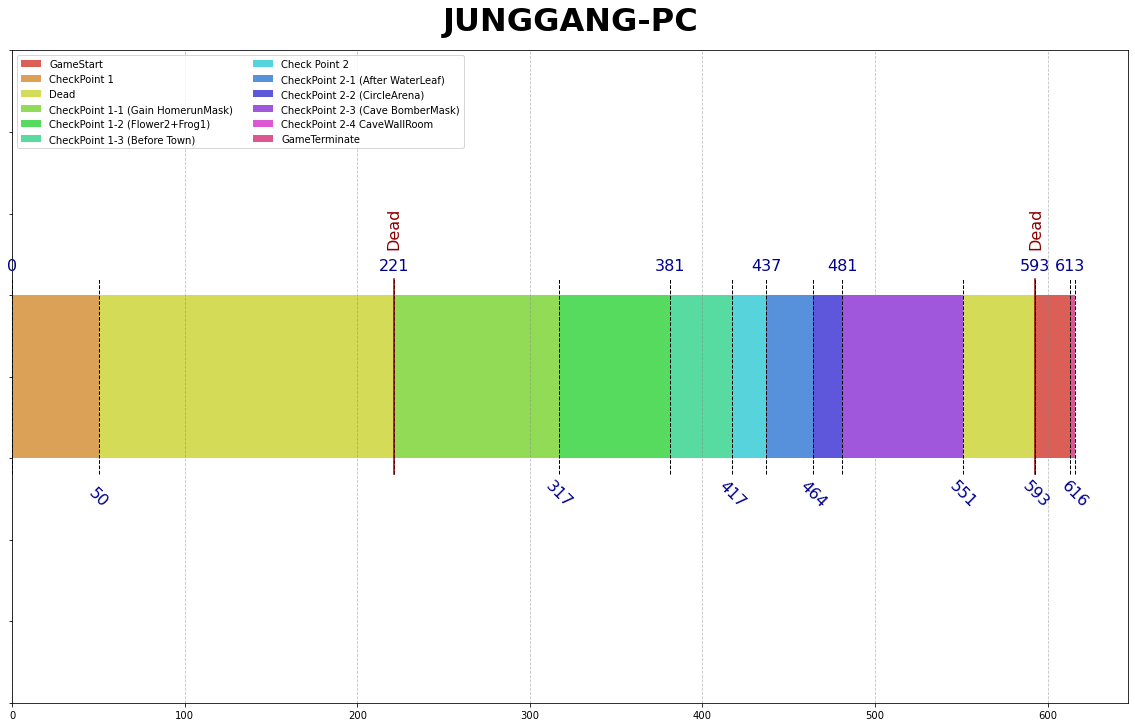

JUNGMOJO-W.png saved


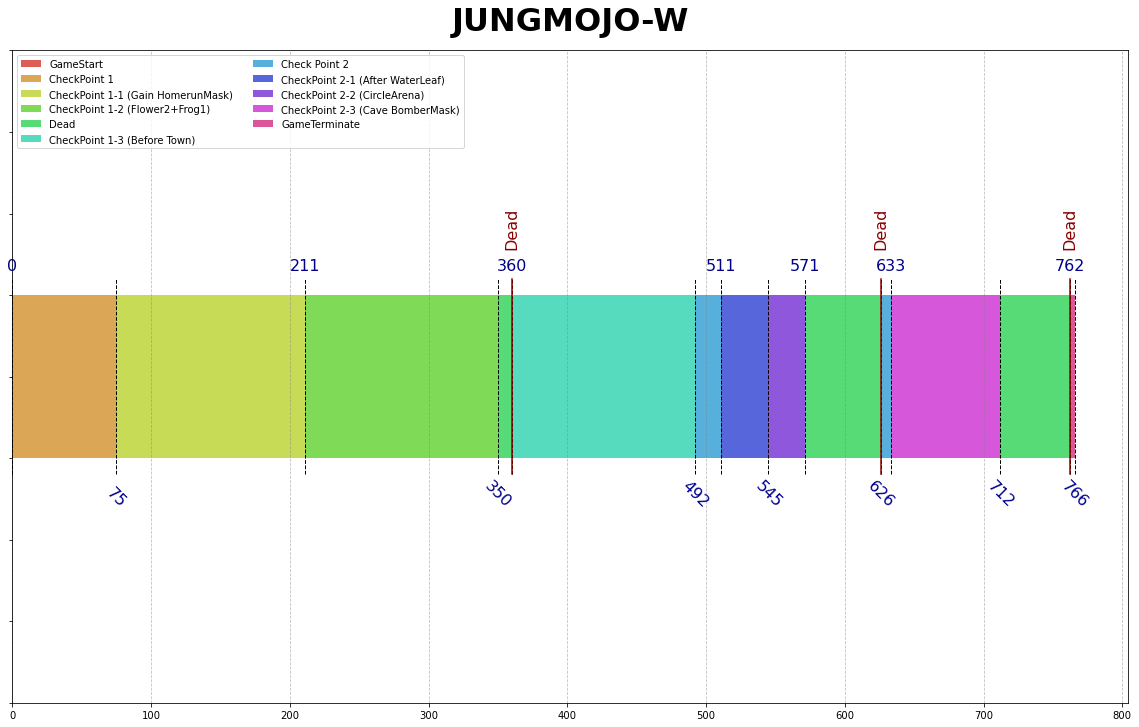

JUNHOKIM-W.png saved


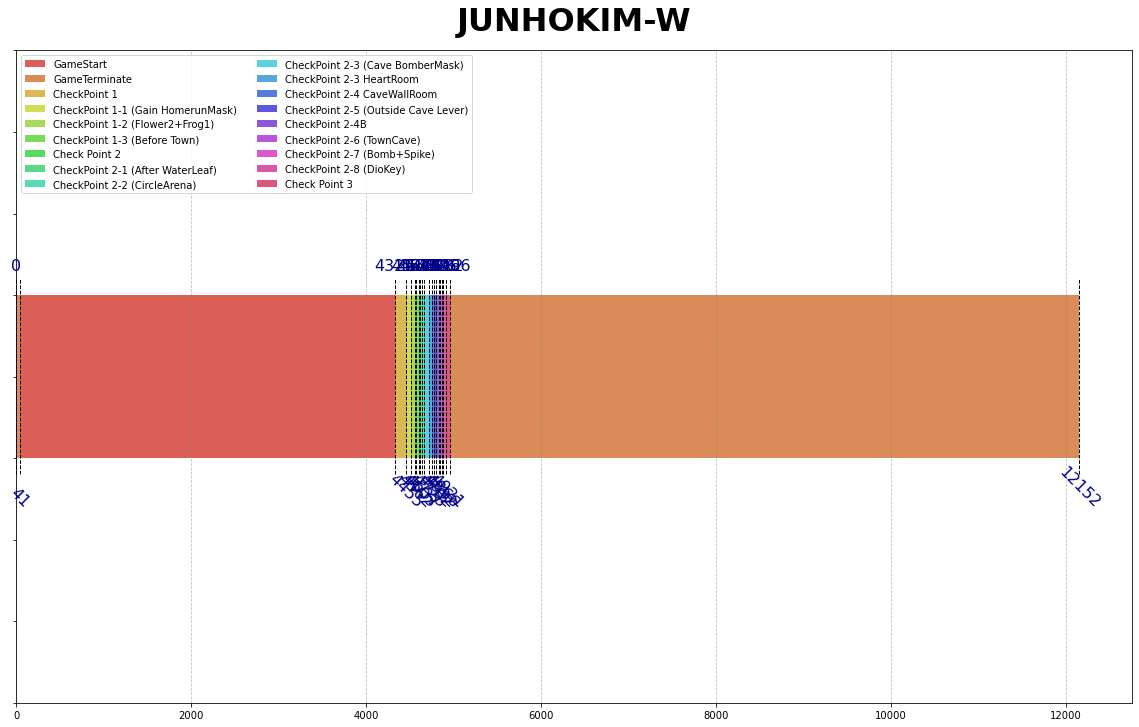

KKH2825-WORK.png saved


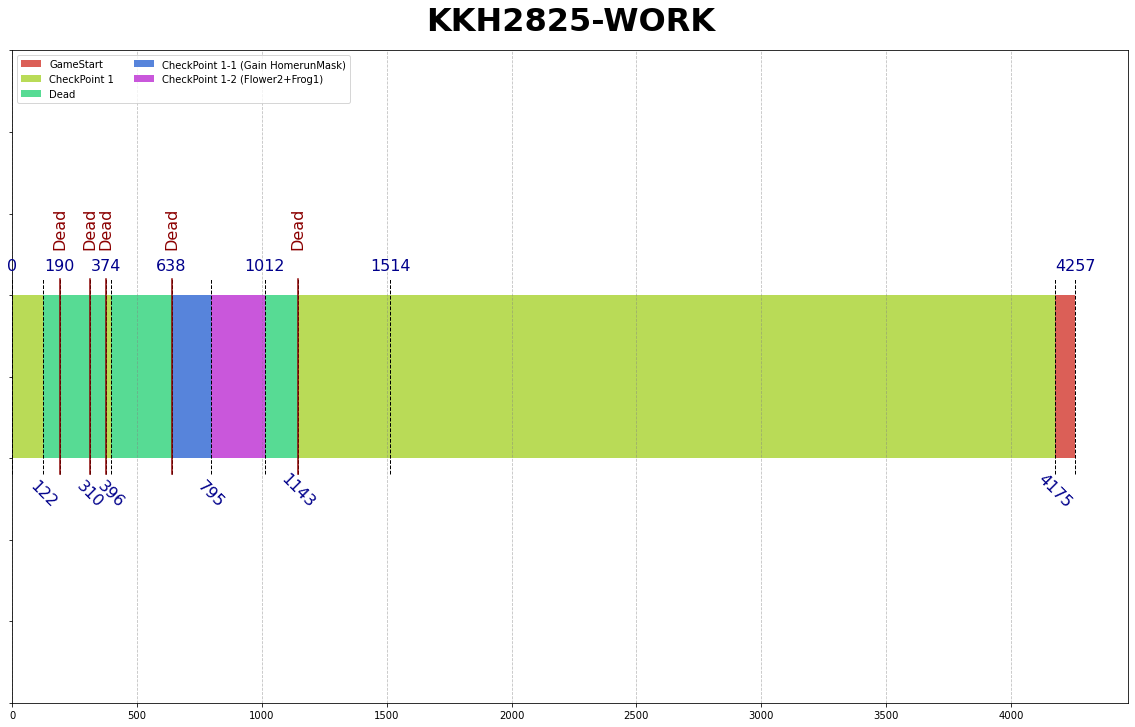

LITTLETREE-W.png saved


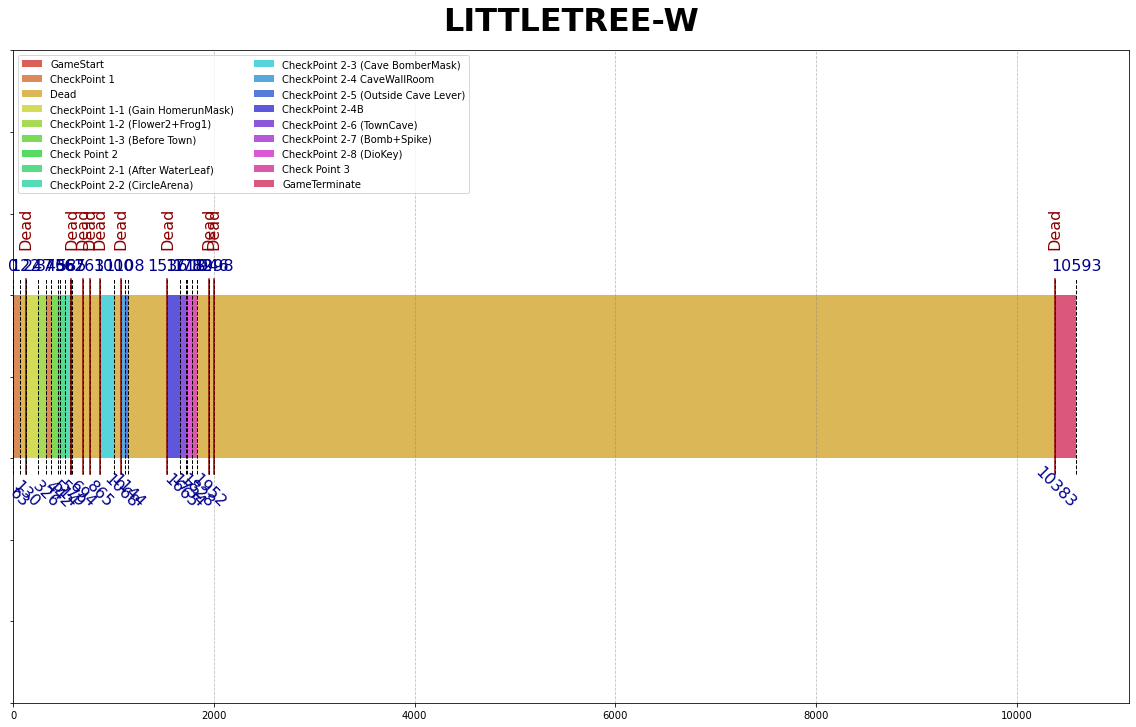

MADJH-W.png saved


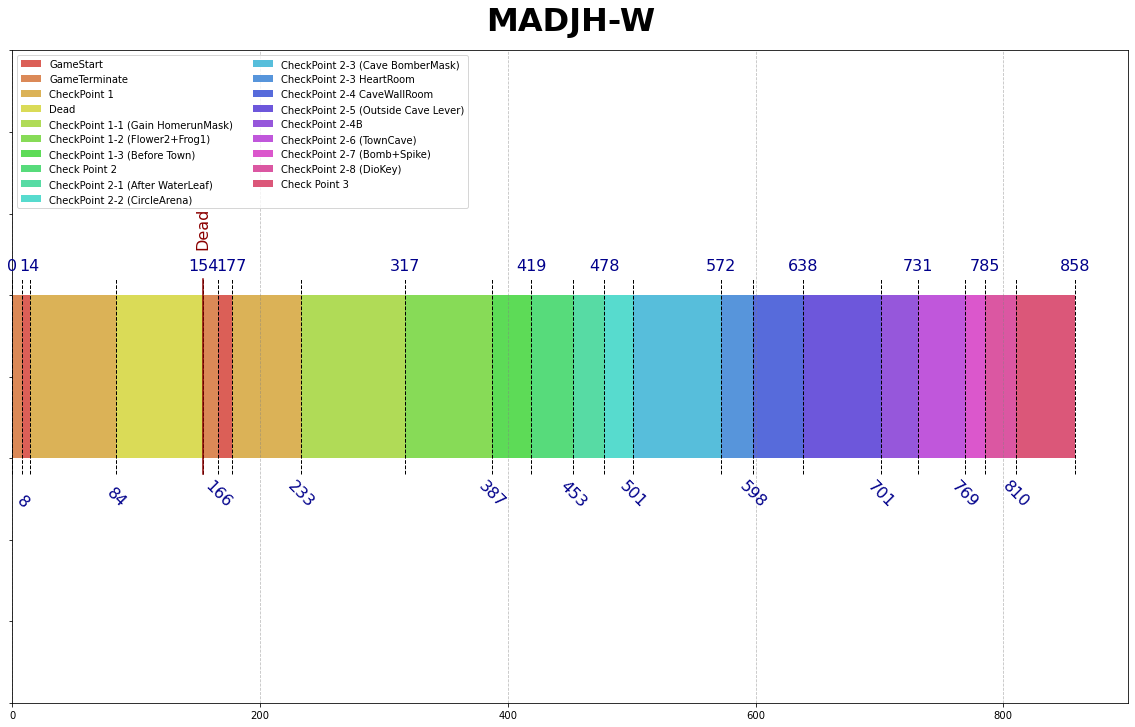

MATHRAN-W.png saved


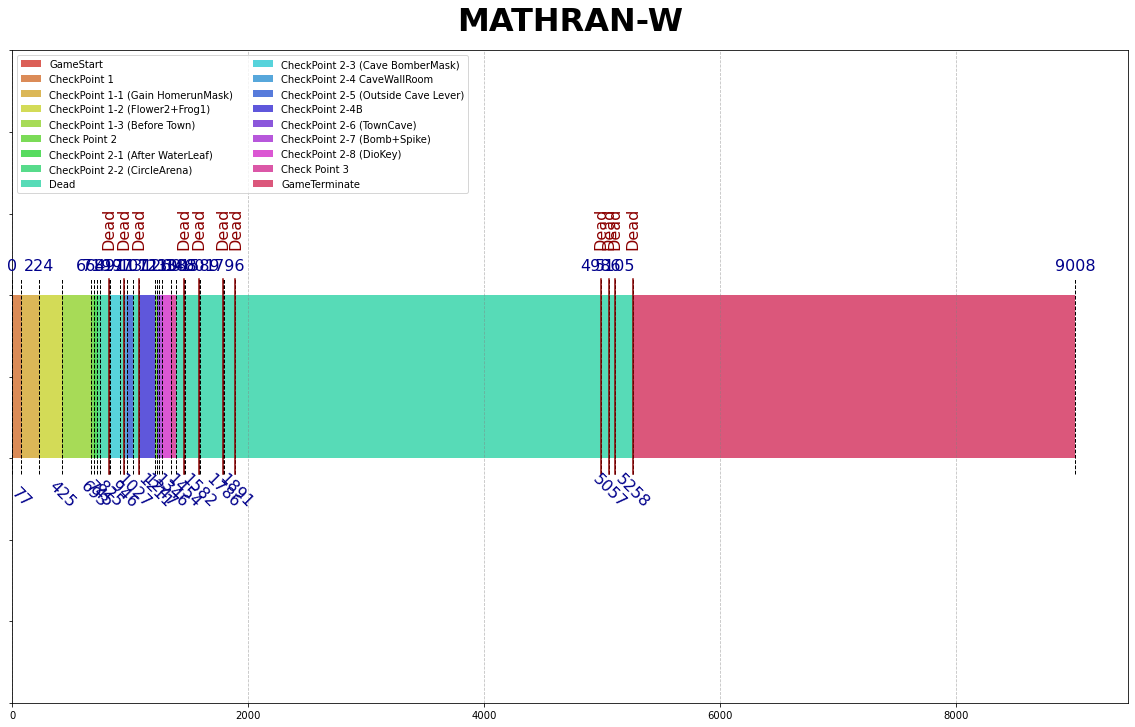

MAXX-H.png saved


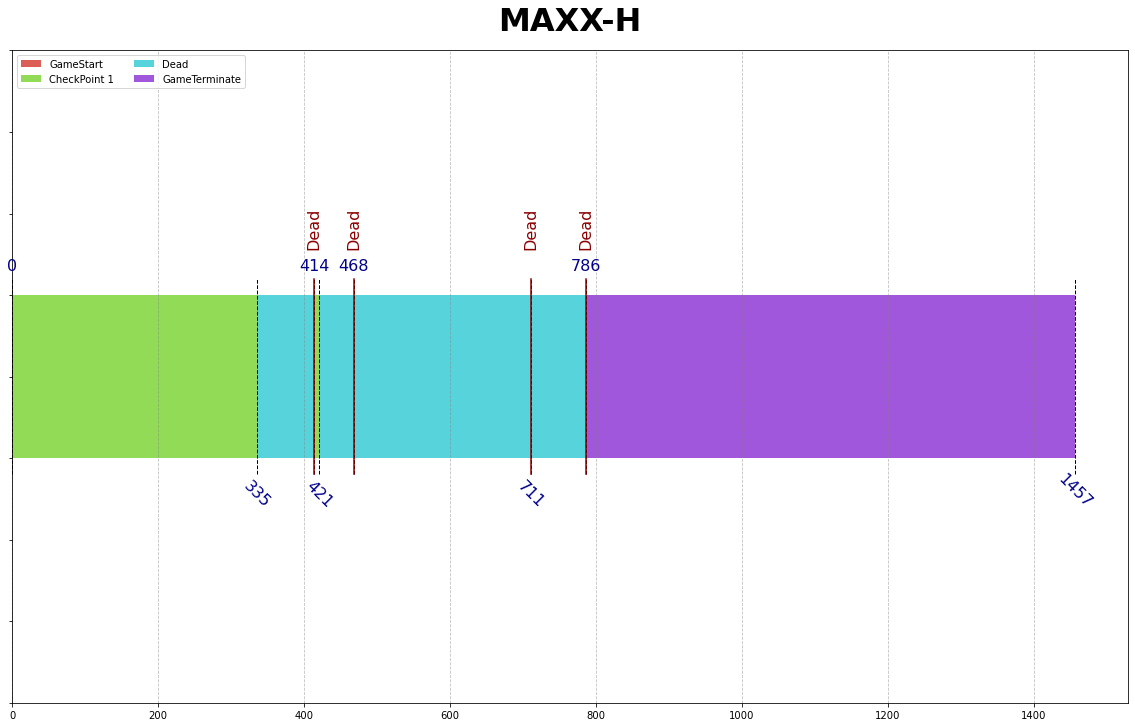

NUGULA-N.png saved


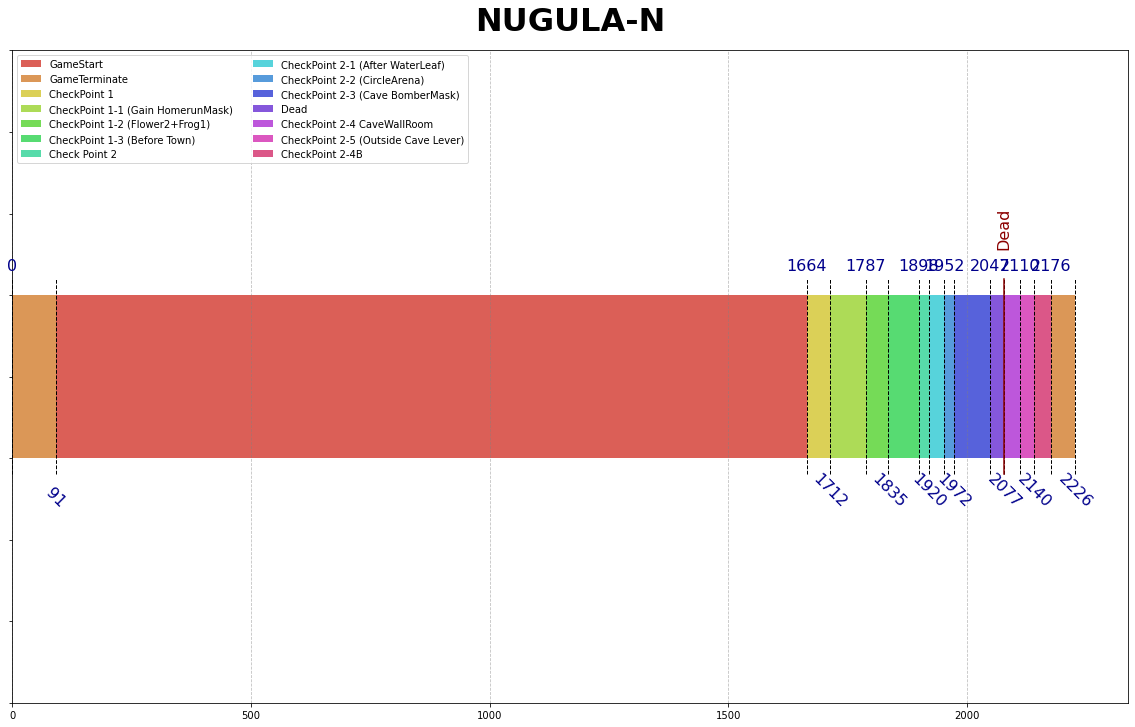

NUGULA-W.png saved


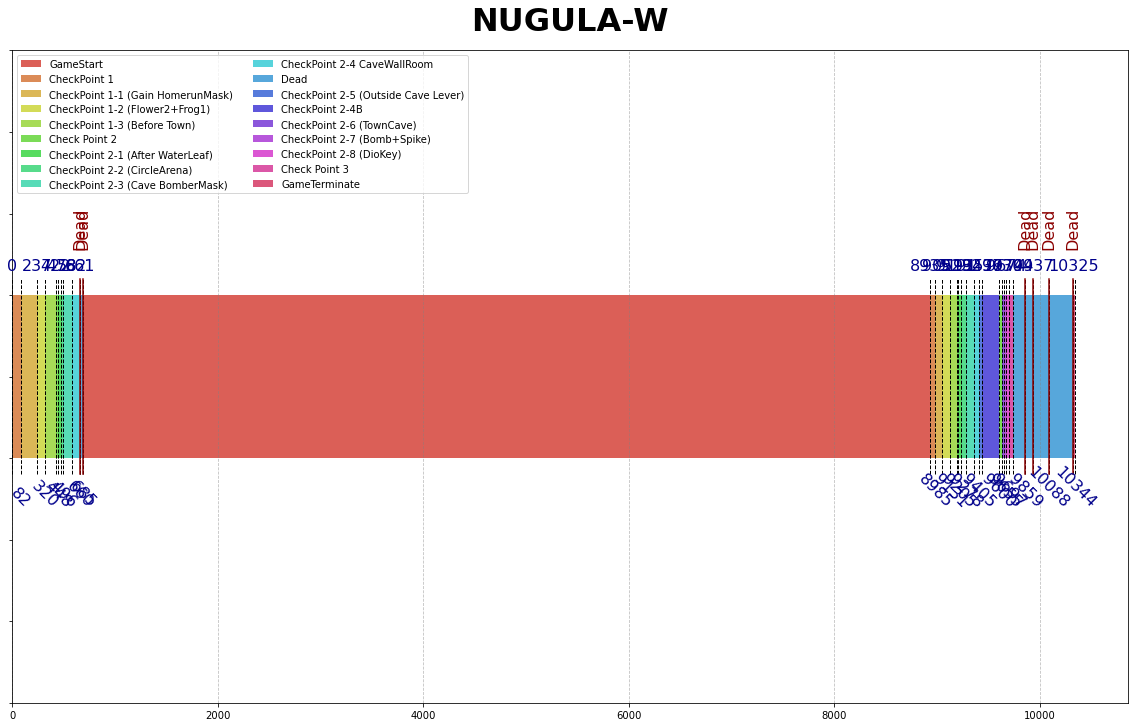

PUBG-ASNAM.png saved


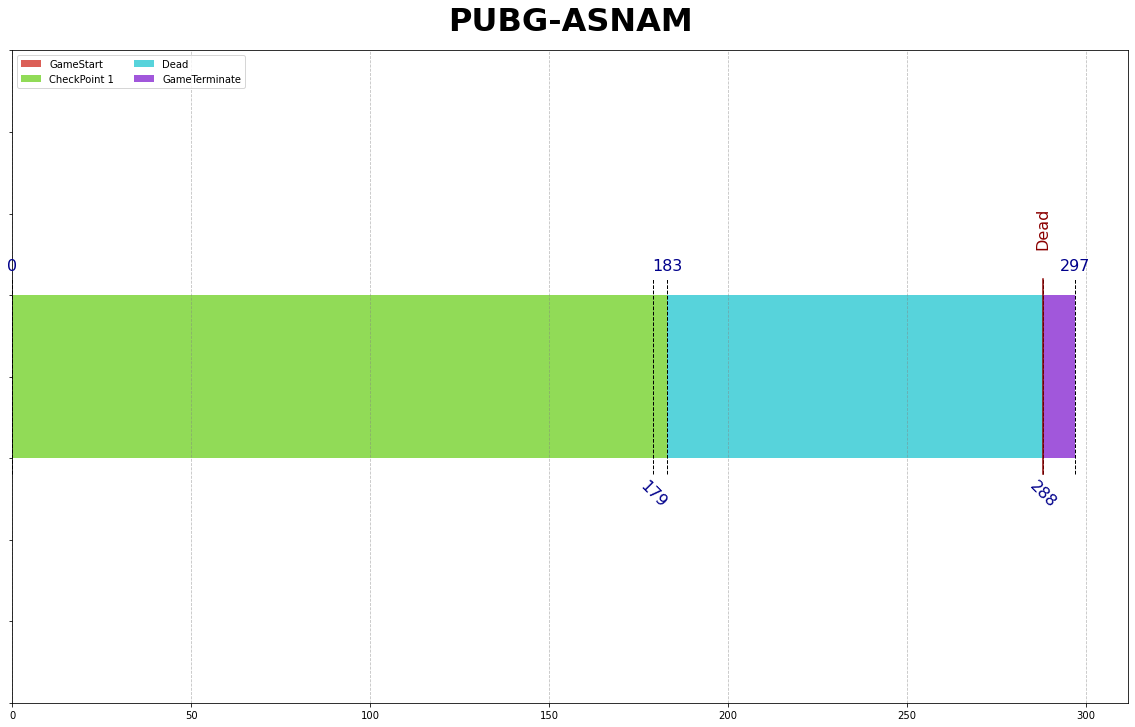

PUBG-CLARARHEE.png saved


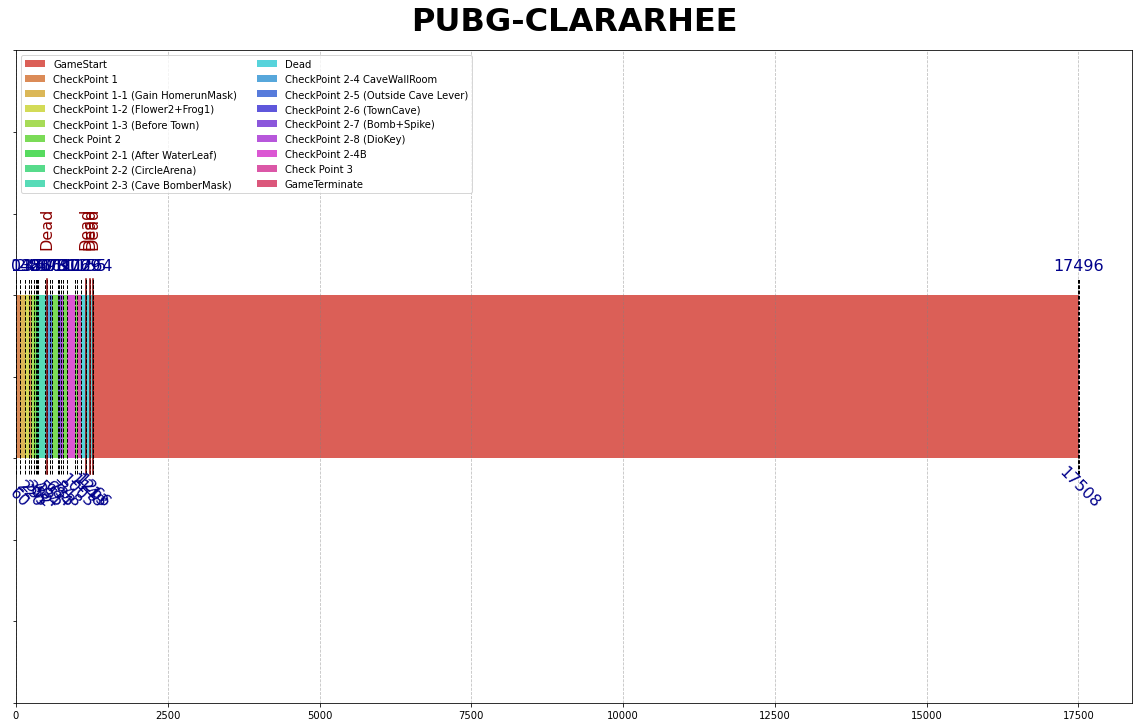

PUBG-SHPAPA-H.png saved


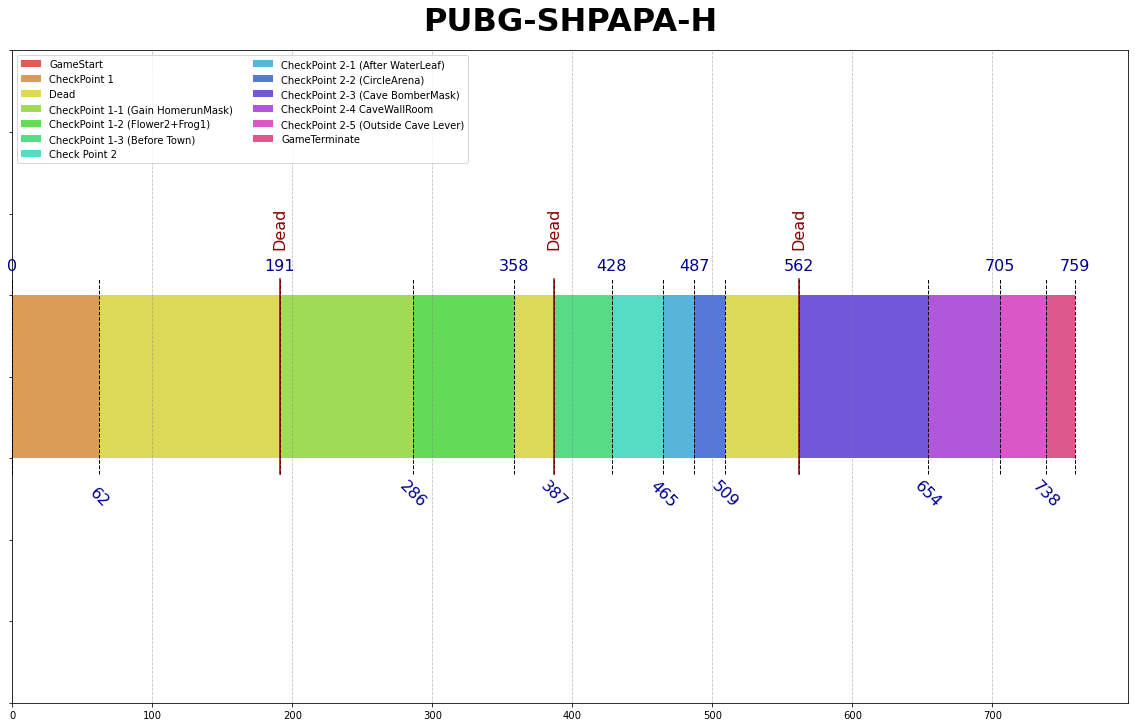

PUBG-SSEOLL.png saved


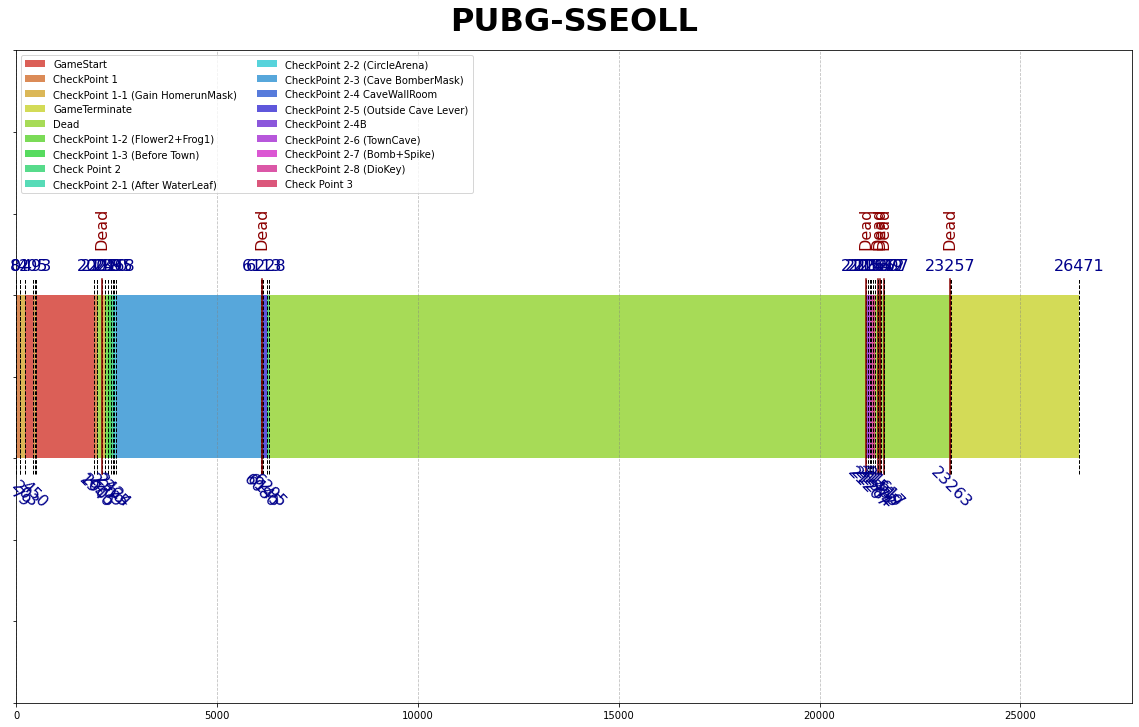

PUBG-YSLEE.png saved


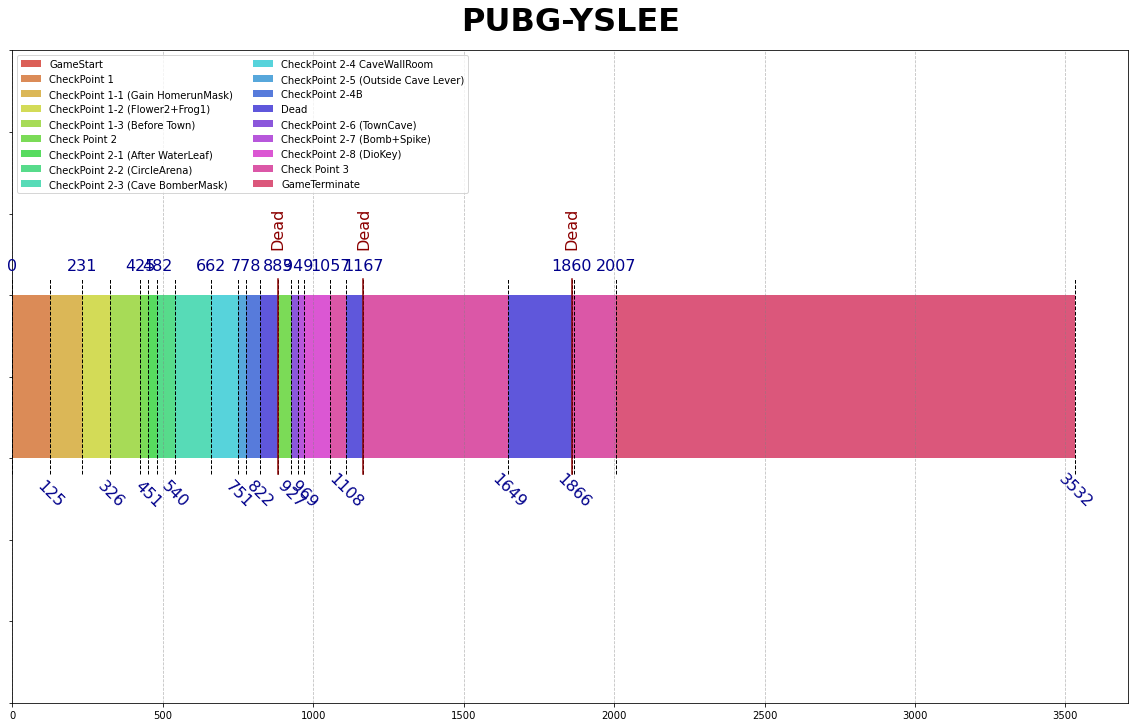

REVLIS-H.png saved


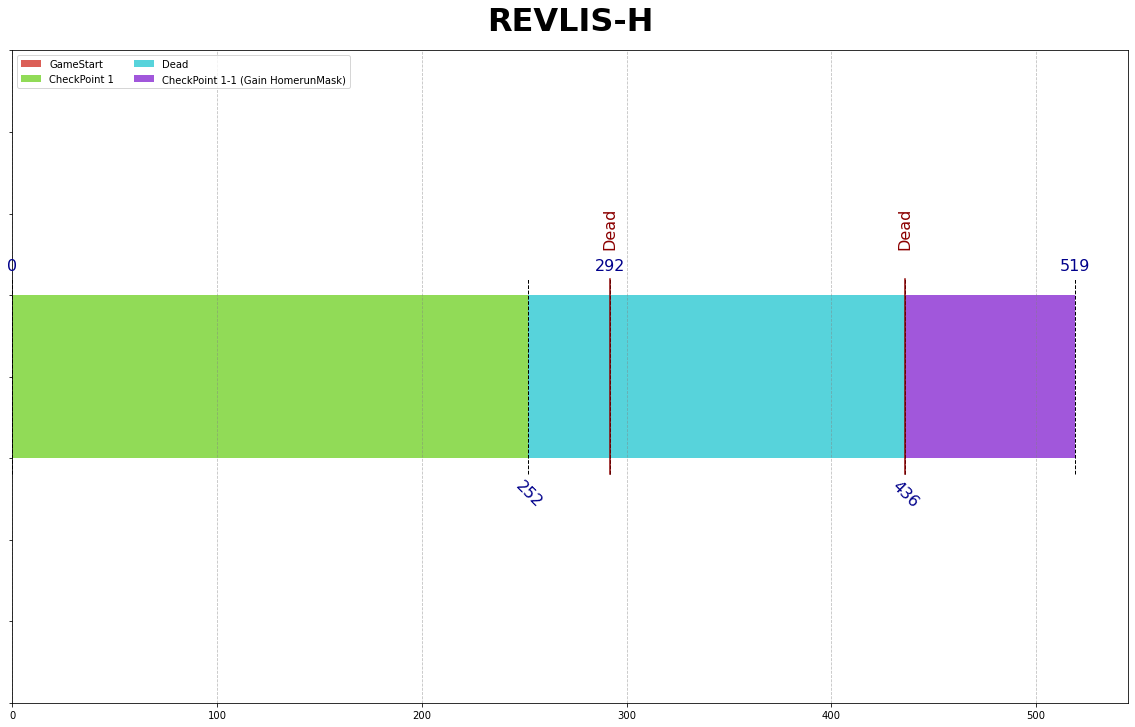

RYUDY-W.png saved


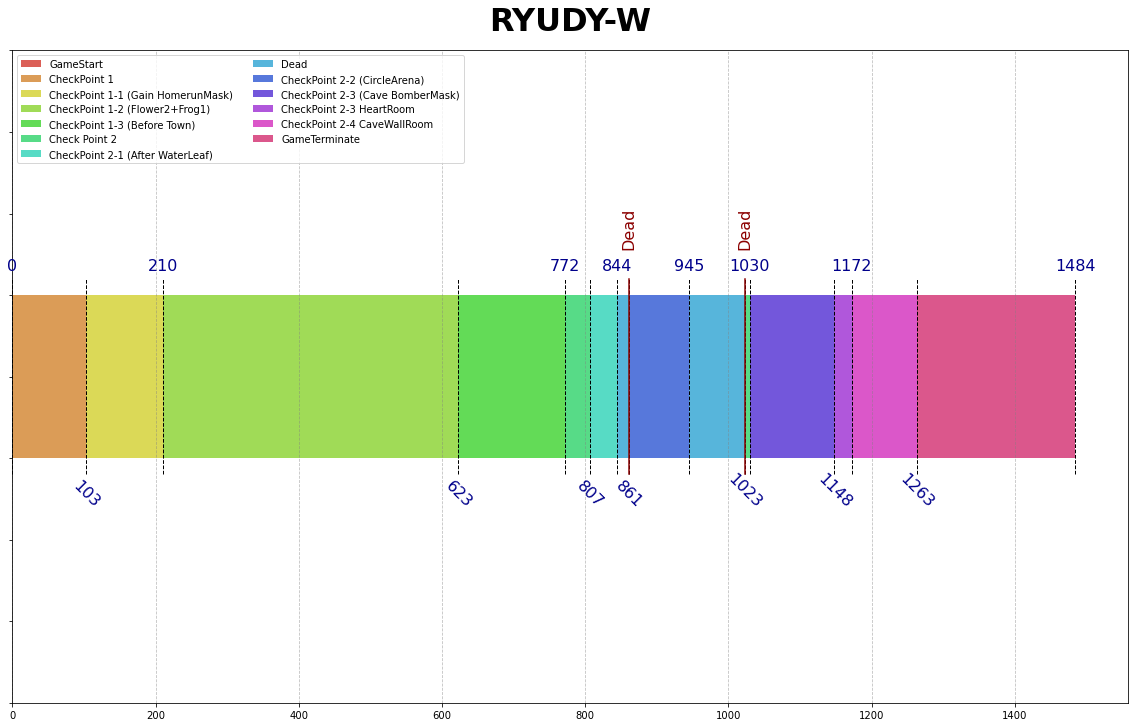

SEONGYULCHOI-W.png saved


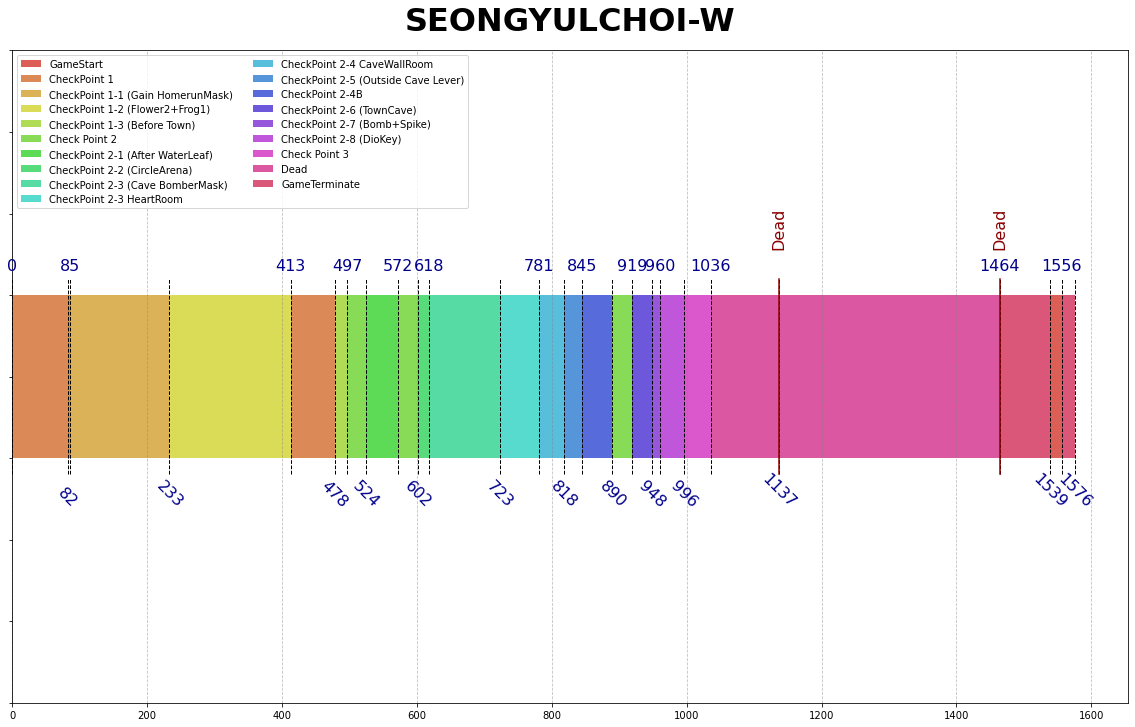

SEUNGHYUNSA-H.png saved


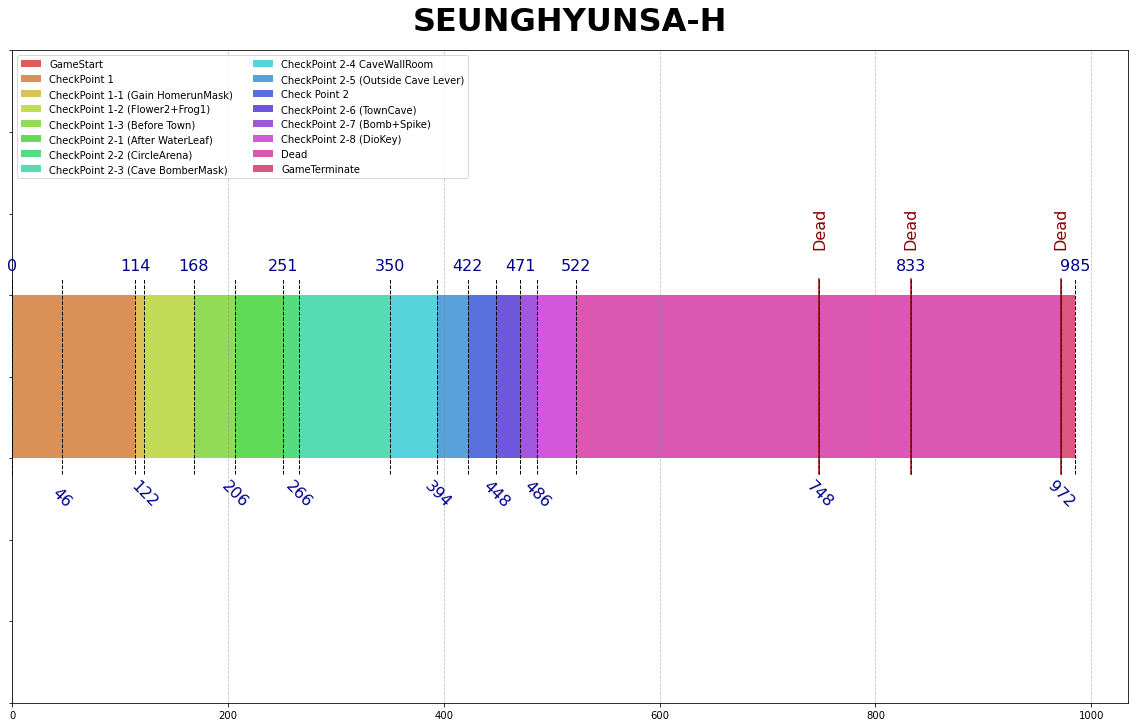

SEYOUNG-W.png saved


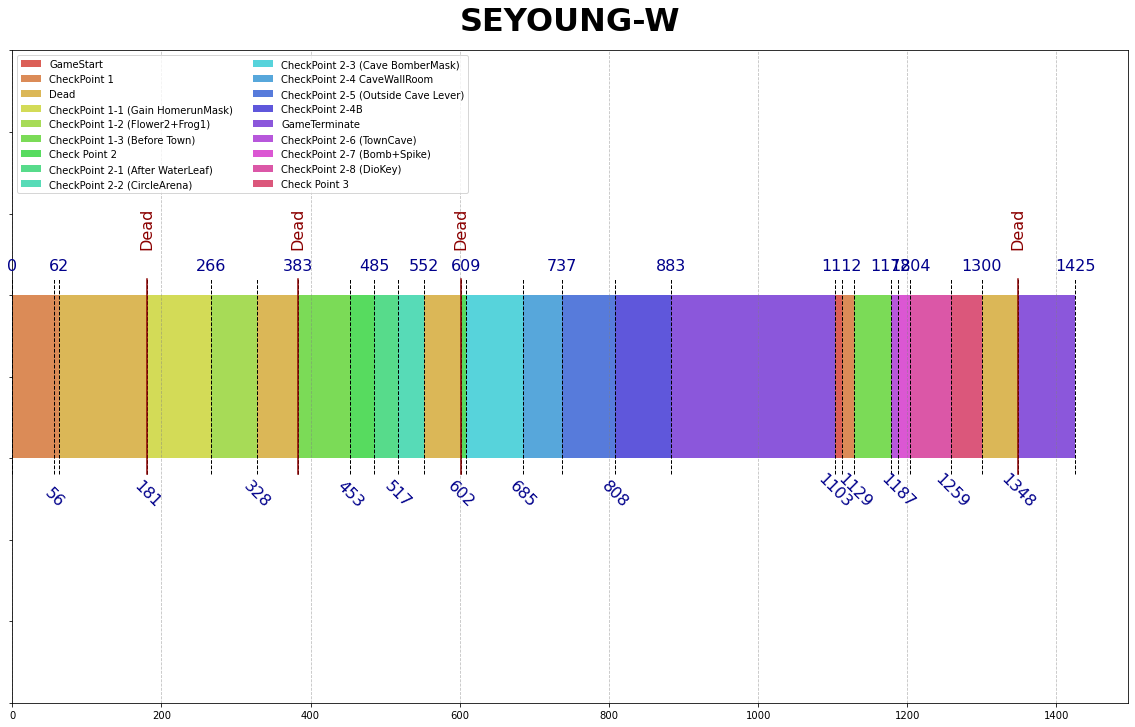

SGYOON-N.png saved


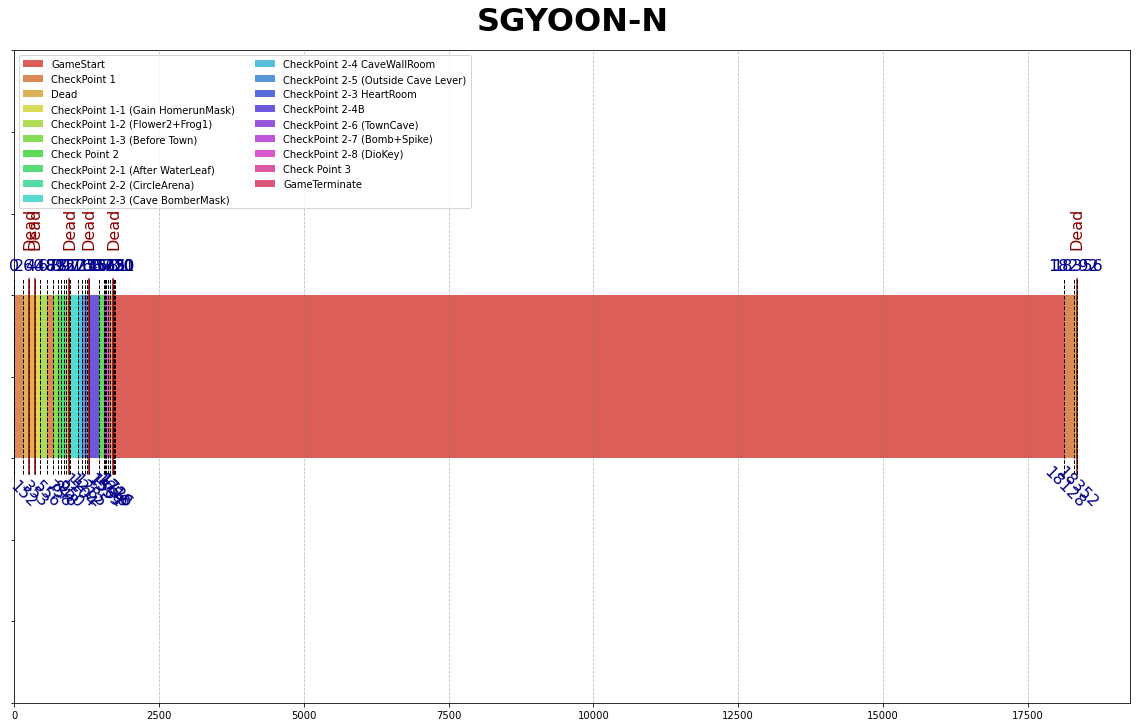

SGYOON-W.png saved


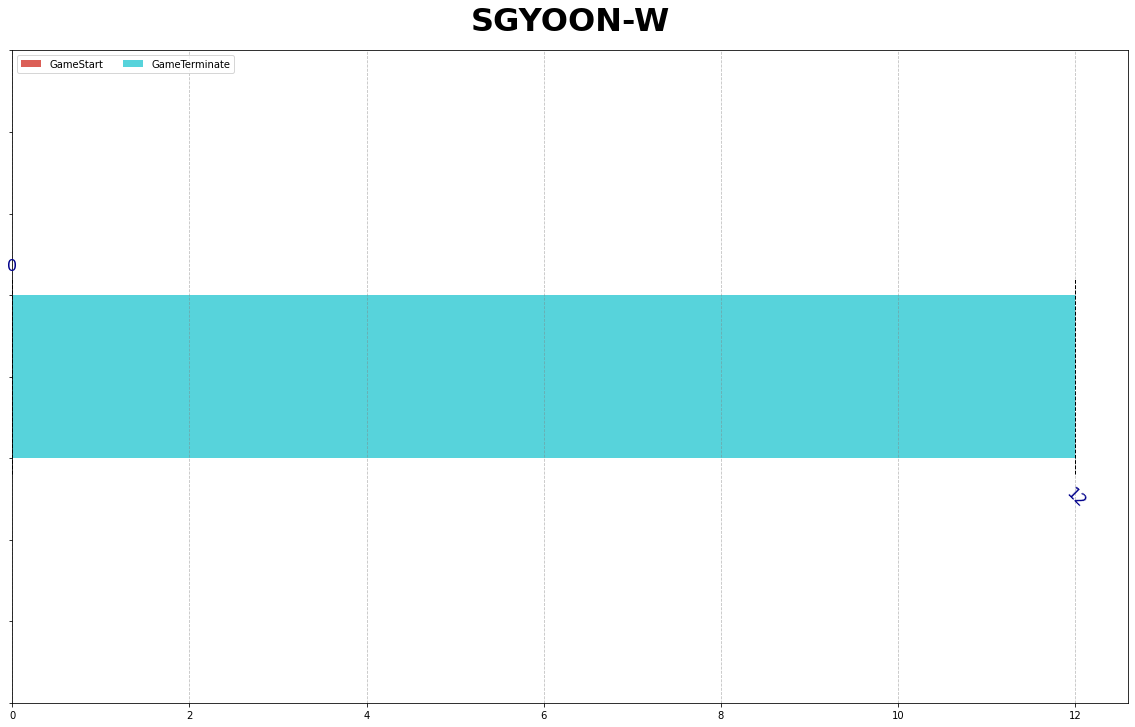

SOOYEON-W.png saved


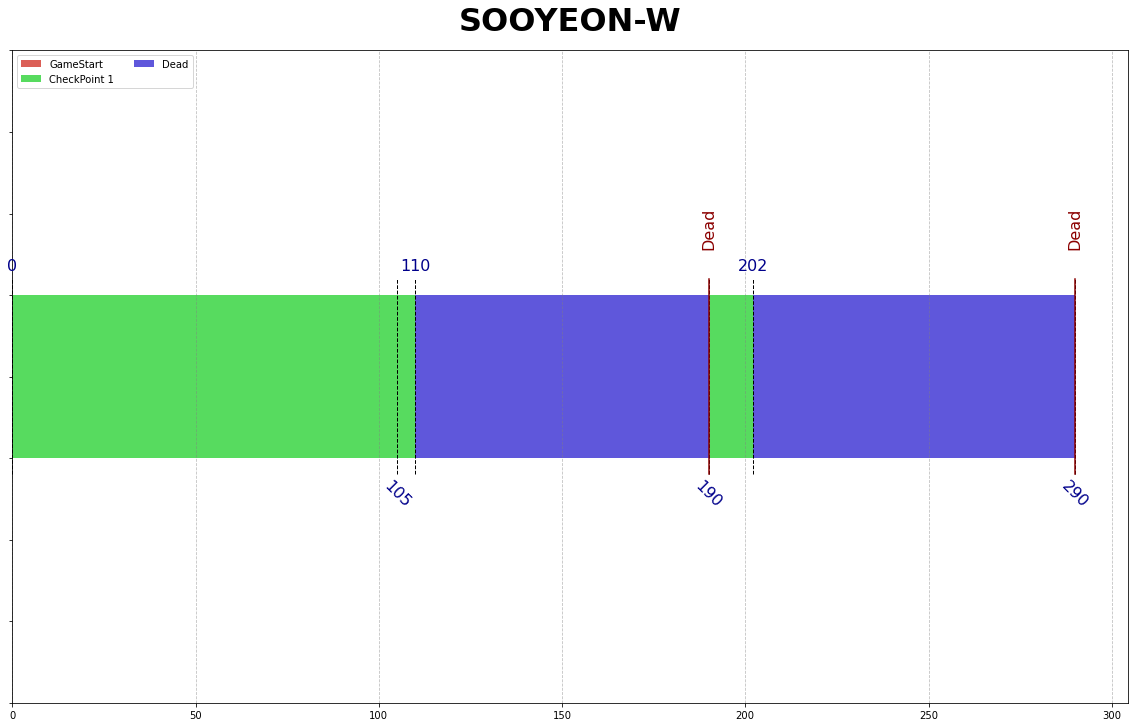

SUYOUNGKIM-W.png saved


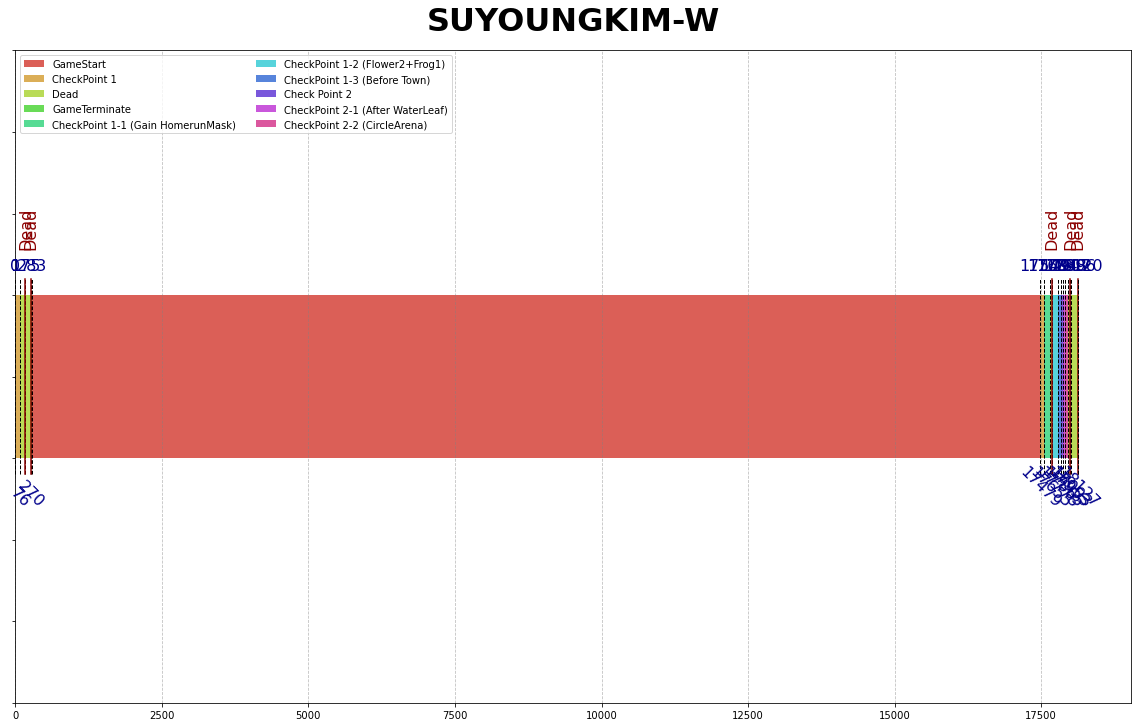

TAMA-W.png saved


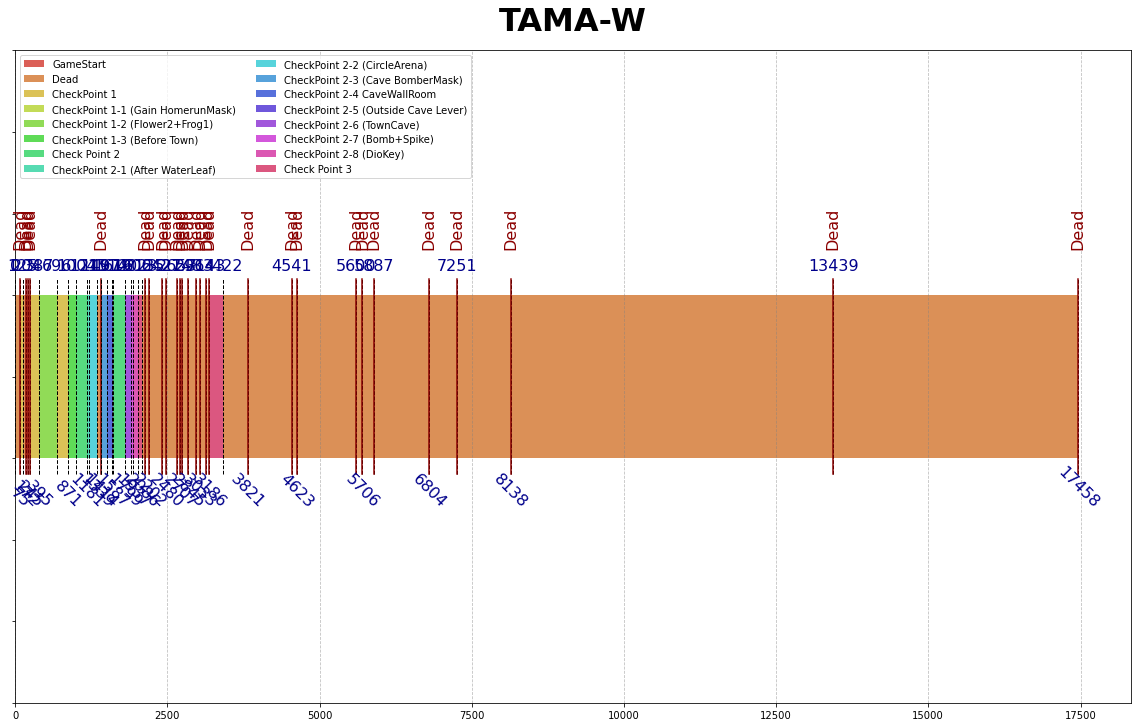

TWKIM-W.png saved


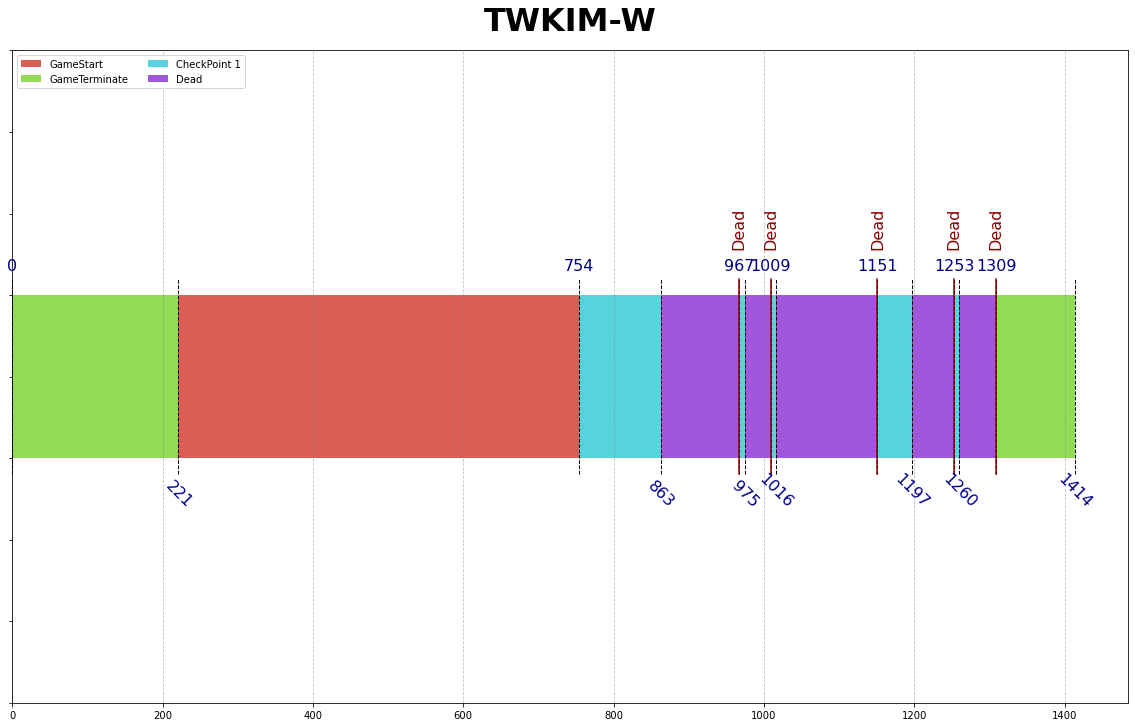

UTOPIA0721-W.png saved


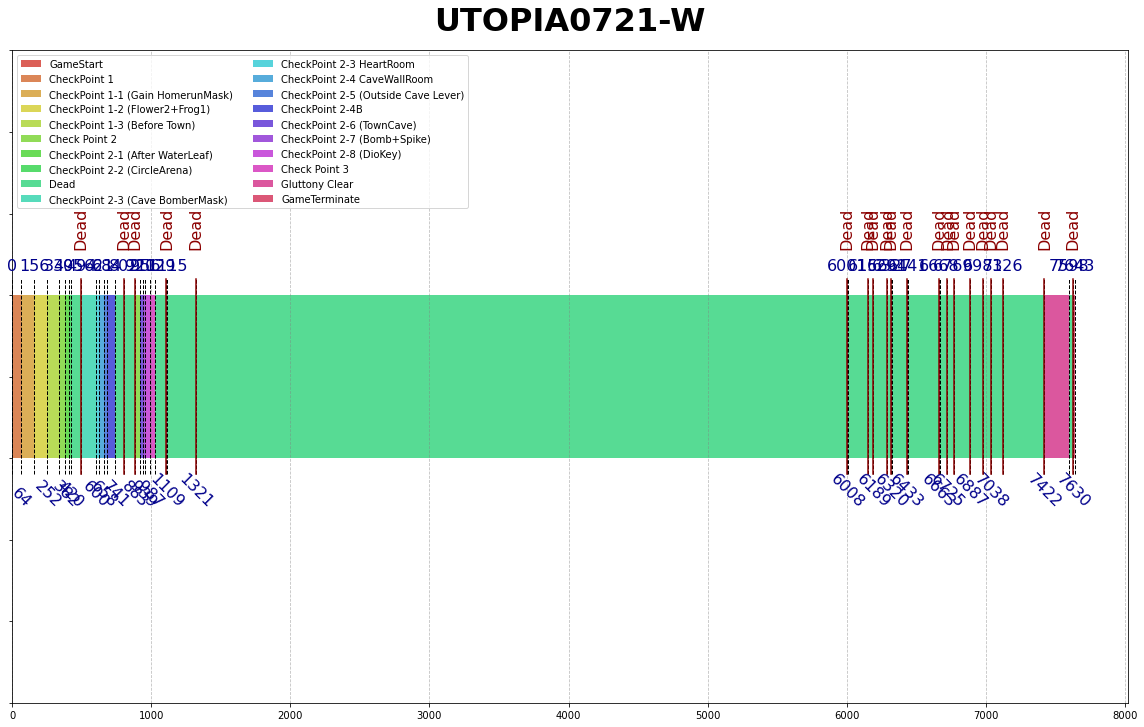

WANGSP1012-W.png saved


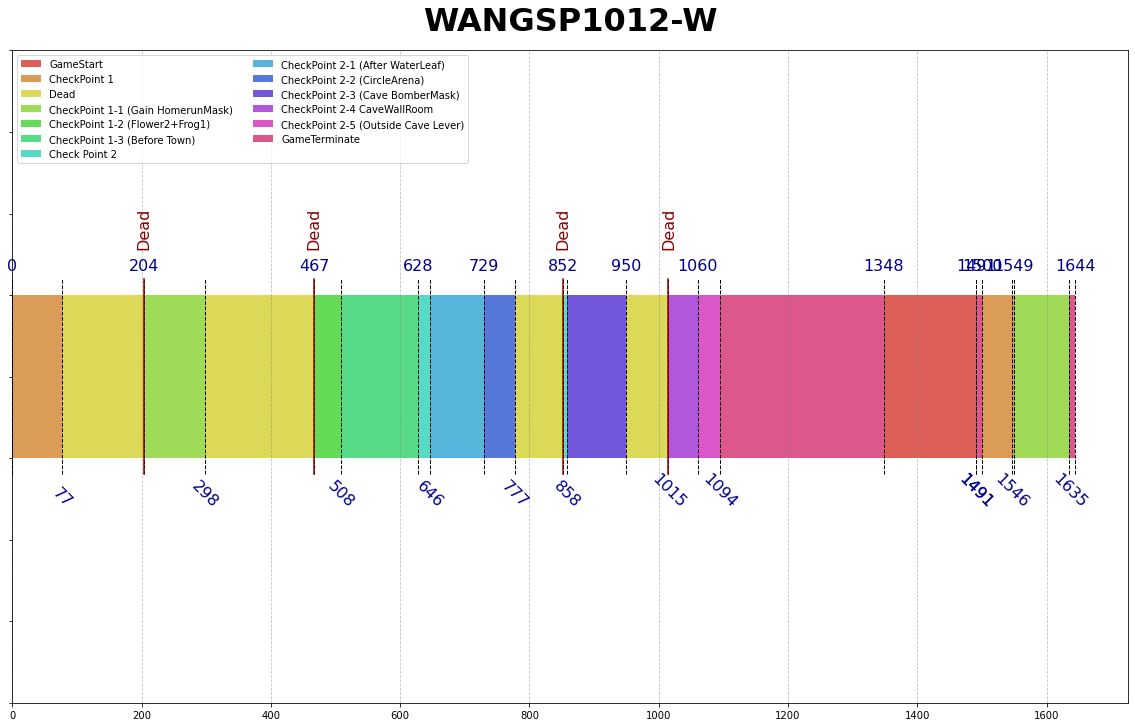

WSAINT-H.png saved


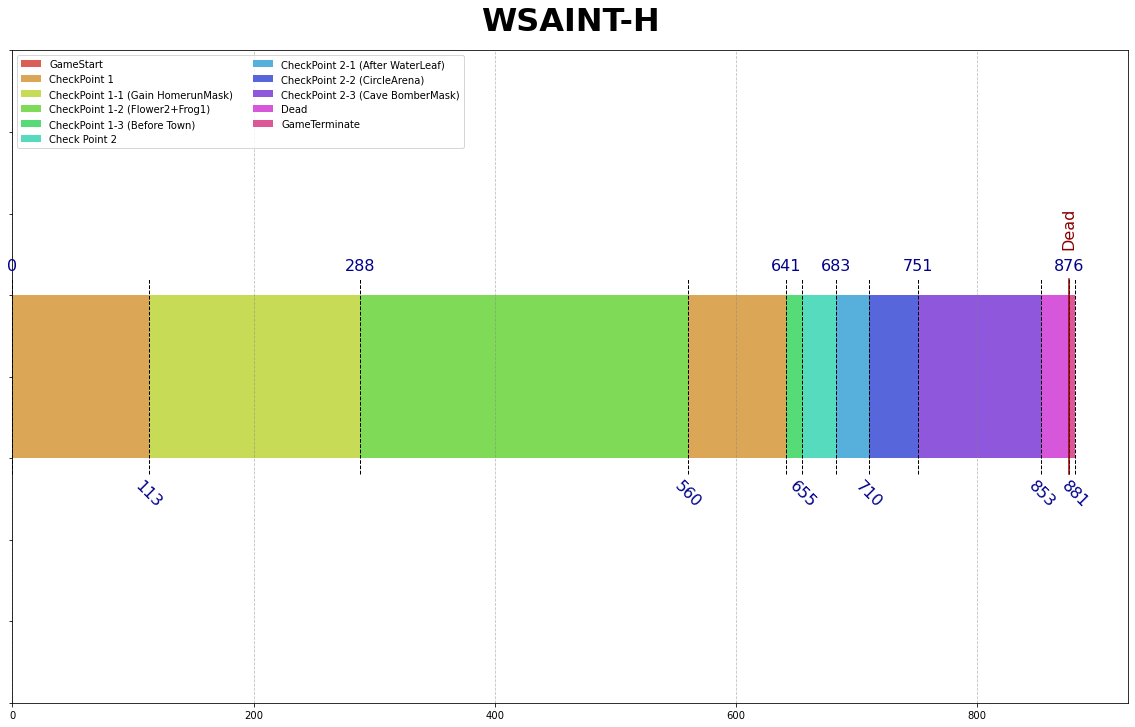

YIONGUON-H.png saved


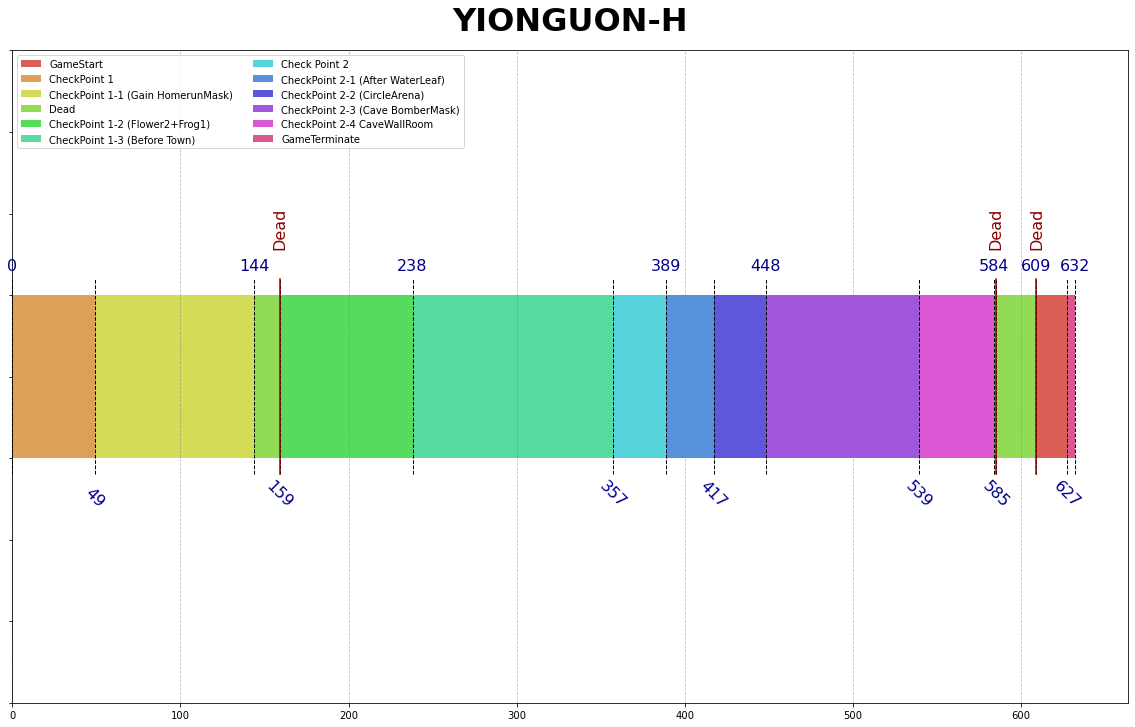

In [358]:
lstHostName = vDF.hostname.unique()
for hn in lstHostName:
    AnalyzeLog(vDF, hn, True) # 순회하며 파일로 출력

----

----

# 이하 테스트

In [359]:
os.path.abspath('') # == __file__

'C:\\Users\\kiwon0116\\ANA\\WnJ'

In [364]:
os.sys.path[0] # == __file__

'C:\\Users\\kiwon0116\\ANA\\WnJ'